# Assignment 2

In this assignment, we will we analysing the dataset from a Bike Sharing system in Washington. The dataset contains various factors that could interfere in whether someone would take a bike, such as temperature, time of day, wind speed, among others, we have three different targets, the number of registered users using the services, the number of casual users doing the same, and the total number of users, we will be using a regression model for every feature, along with two classification models for the easiest feature to predict with regression, and in the end we will compare the results and differences inbetween them.

# Loading the data

To start our analysis we will fist load our dataset onto python and get the header, just to take a first look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from sklearn.linear_model import LinearRegression

bike_hourly = pd.read_csv("hour.csv")
bike_hourly

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


From the header of the data we can get an idea of what our data is about, our target is the number of riders in the system, separated into casual, registered and the total. We also have a lot of different features that could prove useful in our predictions later.

Before splitting our data into training and testing, we need to first for any NaN or invalid values. 

In [2]:
bike_hourly.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As can be seen, we have no NaN values that means our data is clean and we can continue with our analysis without any concerns.

Next we will split our data into training and testing data, we will be using a ratio of 8/2, that means 80% of our data will be used for training and 20% will be used in testing our model, this is a standard split ratio that ensures we have plenty of data to train on and still keep a good amount of data to use for testing.

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bike_hourly, test_size=0.2)

We now have 2 different dataframes, one that will be used to train our model and another to test it, we will now proceed to the E.D.A of our train data, before we start modeling.

# Exploratory data analysis

Before we start modeling we first need to do an analysis of our data, this is important to give us a direction on what to do, how each feature relates to our target and to other features and how to handle them when training our model.

We already checked and there aren't any NaN values on our dataset, it is already mostly clean, we just need to change the datatypes for some features.

In [4]:
# Changing 'workingday' and 'holiday' columns to boolean types for train_data
train_data['workingday'] = train_data['workingday'].astype('bool')
train_data['holiday'] = train_data['holiday'].astype('bool')

# Changing 'workingday' and 'holiday' columns to boolean types for test_data
test_data['workingday'] = test_data['workingday'].astype('bool')
test_data['holiday'] = test_data['holiday'].astype('bool')

train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10193,10194,2012-03-05,1,1,3,19,False,1,True,1,0.26,0.2576,0.53,0.2239,6,220,226
17256,17257,2012-12-26,1,1,12,21,False,3,True,2,0.30,0.2727,0.87,0.2985,0,20,20
8363,8364,2011-12-20,4,0,12,3,False,2,True,2,0.34,0.3636,0.61,0.0000,1,1,2
3298,3299,2011-05-22,2,0,5,8,False,0,False,1,0.60,0.5909,0.73,0.0896,29,65,94
11912,11913,2012-05-16,2,1,5,13,False,3,True,1,0.72,0.6515,0.42,0.0000,77,273,350


Now workingday and holiday are boolean features, doing so will make them more readable and more useful to our models, while keeping all of their information.

We can also change some columns into categorical features.

We can also change the yr feature into a boolean; that would be something close to the process called one-hot encoding, where you take a categorical feature and separate it into various boolean features, each one symbolizing if the original value was one of the categories. 

E.g. we have a feature, colour, that can be either red, blue or green, to one-hot encode this, we can create three new columns, is_red, is_blue, is_green, if the original value was blue then we would make the value of our new colums true for is_blue and false for is_red and is_green.

That approach usually has the disadvantage of generating too many new columns which can create difficulties when creating a model and increase the runtime for it, in this case we can just change our yr feature, which has two values into a single boolean column "is_yr_1" in that way "one-hot encoding" it without generating new columns and keeping the original data while making it more manageable for us and our model.

In [5]:
# change the name of column 'yr' into 'is_yr_one' 
#Changing 'yr' collumn to boolean type for both train and test data 
train_data['yr'] = train_data['yr'].astype('bool')
test_data['yr'] = test_data['yr'].astype('bool')

#Changing the name of the 'yr' collumn into 'is_yr_one'
train_data.rename(columns={'yr': 'is_yr_one'}, inplace=True)
test_data.rename(columns={'yr': 'is_yr_one'}, inplace=True)

After changing that many datatypes it can be a good idea to check for any NaN values that can be caused by improper conversion.

In [6]:
train_data.isna().sum()

instant       0
dteday        0
season        0
is_yr_one     0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
test_data.isna().sum()

instant       0
dteday        0
season        0
is_yr_one     0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Thankfully all our conversions went trough wintout any problems, we can just continue on with our E.D.A

We can now take another look into our dataframe with the new datatypes.

In [8]:
train_data

,instant,dteday,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10193,10194,2012-03-05,1,True,3,19,False,1,True,1,0.26,0.2576,0.53,0.2239,6,220,226
17256,17257,2012-12-26,1,True,12,21,False,3,True,2,0.30,0.2727,0.87,0.2985,0,20,20
8363,8364,2011-12-20,4,False,12,3,False,2,True,2,0.34,0.3636,0.61,0.0000,1,1,2
3298,3299,2011-05-22,2,False,5,8,False,0,False,1,0.60,0.5909,0.73,0.0896,29,65,94
11912,11913,2012-05-16,2,True,5,13,False,3,True,1,0.72,0.6515,0.42,0.0000,77,273,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,4260,2011-07-01,3,False,7,9,False,5,True,1,0.74,0.6515,0.35,0.1642,58,202,260
11328,11329,2012-04-22,2,True,4,5,False,0,False,2,0.44,0.4394,0.77,0.2239,0,6,6
11414,11415,2012-04-25,2,True,4,19,False,3,True,1,0.60,0.5909,0.20,0.1940,42,501,543
8267,8268,2011-12-16,4,False,12,3,False,5,True,1,0.46,0.4545,0.82,0.1343,2,3,5


Our data now looks overall way more readable, and the alterations we made will hopefully help with creating our models later.

# Visualisation functions

First, we will make some standard visualisation functions so we can visualize both categorical and numerical features without repeating our code all the time.

In [9]:
def numVisualisation (feature : str):#Generic function to create basic visualisations for numerical features
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    sns.histplot(data=train_data,x=feature,ax=axes[0])
    sns.violinplot(data=train_data,x=feature,ax=axes[1])

def catVisualisation(feature : str):#Generic function to create basic visualisations for categorical targets
    sns.countplot(data=train_data,x=feature)

Next we will make some functions to visualise the relationship of our features to the targets.

In [10]:
def numVisualisationTgt(feature : str):#Generic function to create vizualizations of the relationship between the feature and targets for numerical features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.regplot(data=train_data.sample(200),x='casual',y= feature,ax=axes[0])#we are only using a random sampling of 100 values as to make
    sns.regplot(data=train_data.sample(200),x='registered',y= feature,ax=axes[1])#the visualisations more reabable while keeping the data
    sns.regplot(data=train_data.sample(200),x='cnt',y= feature,ax=axes[2])

def catVisualisationTgt(feature : str):#generic function to create visualisations of the relationship between the feature and the targets for categorical features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.boxplot(data=train_data.sample(200),x='casual',y=feature,ax=axes[0],log_scale=True,orient='h')
    sns.boxplot(data=train_data.sample(200),x='registered',y=feature,ax=axes[1],log_scale=True,orient='h')
    sns.boxplot(data=train_data.sample(200),x='cnt',y=feature,ax=axes[2],log_scale=True,orient='h')

def XLcatVisualisationTgt(feature : str):#generic fucntion to create viasualisations of the realtionship between the feature and the targets for categorical features with lots of categories
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.barplot(data=train_data,x=feature,y='casual',ax=axes[0])
    sns.barplot(data=train_data,x=feature,y='registered',ax=axes[1])
    sns.barplot(data=train_data,x=feature,y='cnt',ax=axes[2])
def boolVisualisationTgt(feature : str):#generic function to create visualisations of the relationship between the feature and the targets for boolean features
    fig, axes = plt.subplots(3,1, figsize=(25, 10))
    sns.histplot(data=train_data.sample(200),hue=feature,x='casual',ax=axes[0],multiple='stack',log_scale=True)
    sns.histplot(data=train_data.sample(200),hue=feature,x='registered',ax=axes[1],multiple='stack',log_scale=True)
    sns.histplot(data=train_data.sample(200),hue=feature,x='cnt',ax=axes[2],multiple='stack',log_scale=True)
    #the reason for using logarithmic scaling where availiable will be explained later

# Target analysis

Before proceeding to analyzing our fetures it is a good idea to take a look at the overall shape and distribution of our targets.

<Axes: xlabel='cnt', ylabel='Count'>

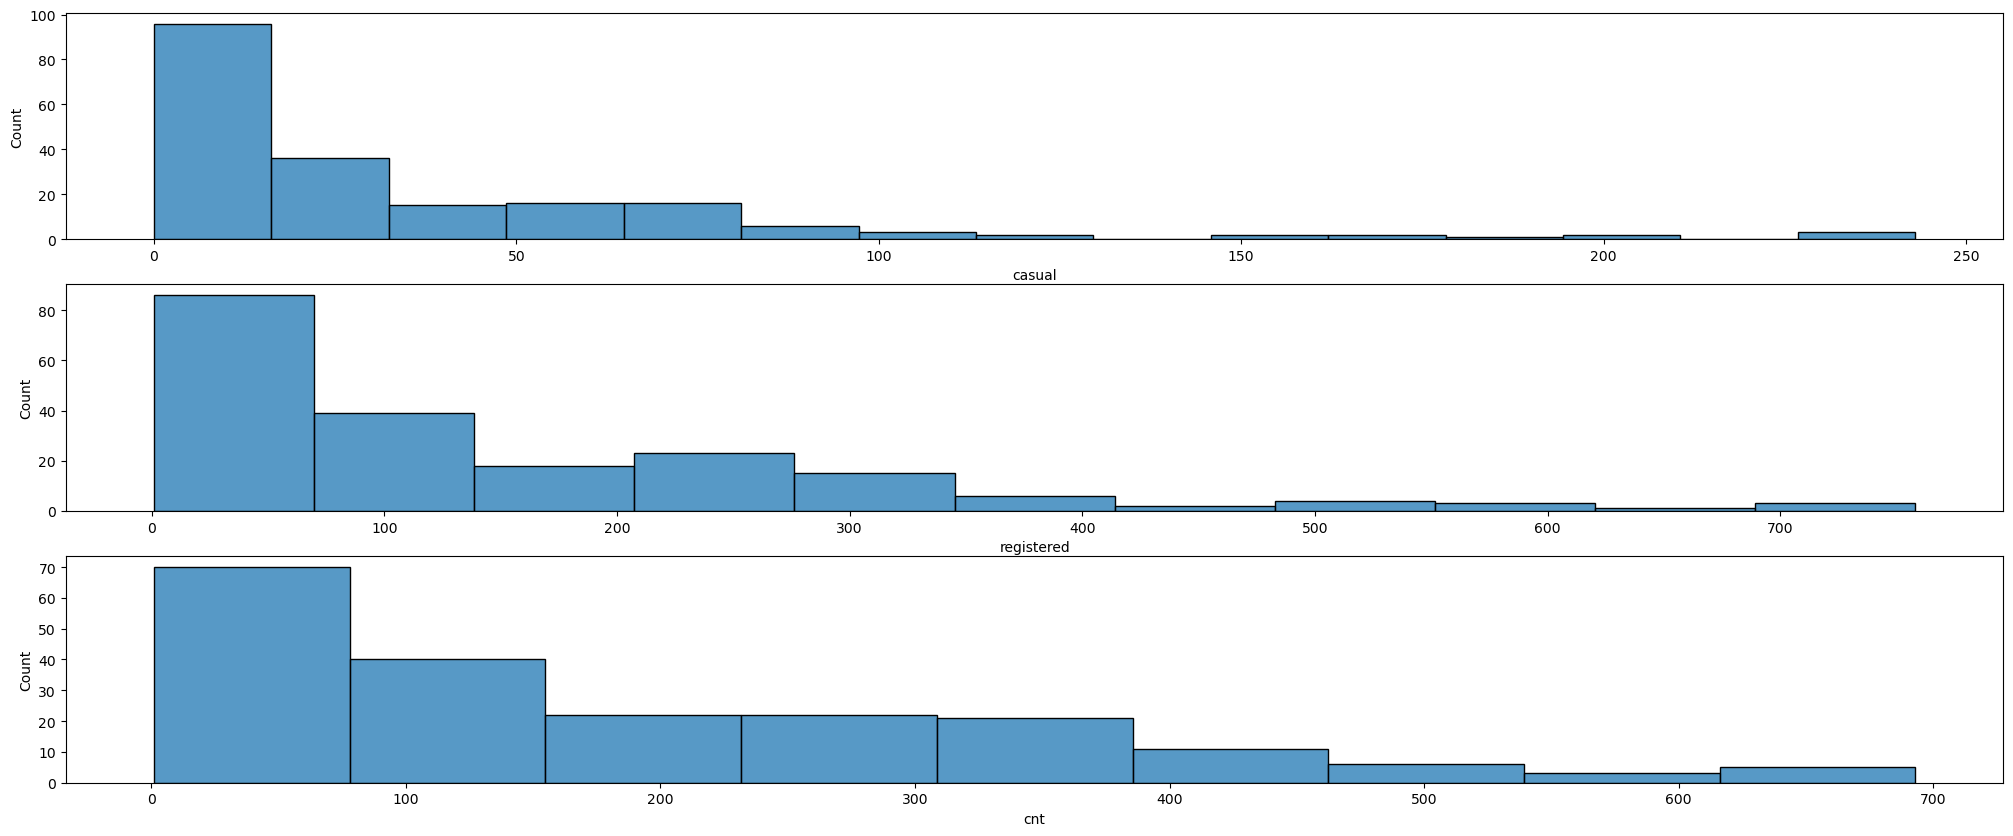

In [11]:
fig, axes = plt.subplots(3,1, figsize=(25, 10))
sns.histplot(data=train_data.sample(200),x='casual',ax=axes[0])
sns.histplot(data=train_data.sample(200),x='registered',ax=axes[1])
sns.histplot(data=train_data.sample(200),x='cnt',ax=axes[2])

As can be seen in our graphs all of our targets have a mostly exponential distribution, that is alright and will not have an impact on our modeling, but it can skew some of our visualisations, so to make them more accurately represent the data, we will be using logarithmic scaling for visualising relationships between our targets and the features where it is available.

We can further verify that distribution with a q-q plot.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

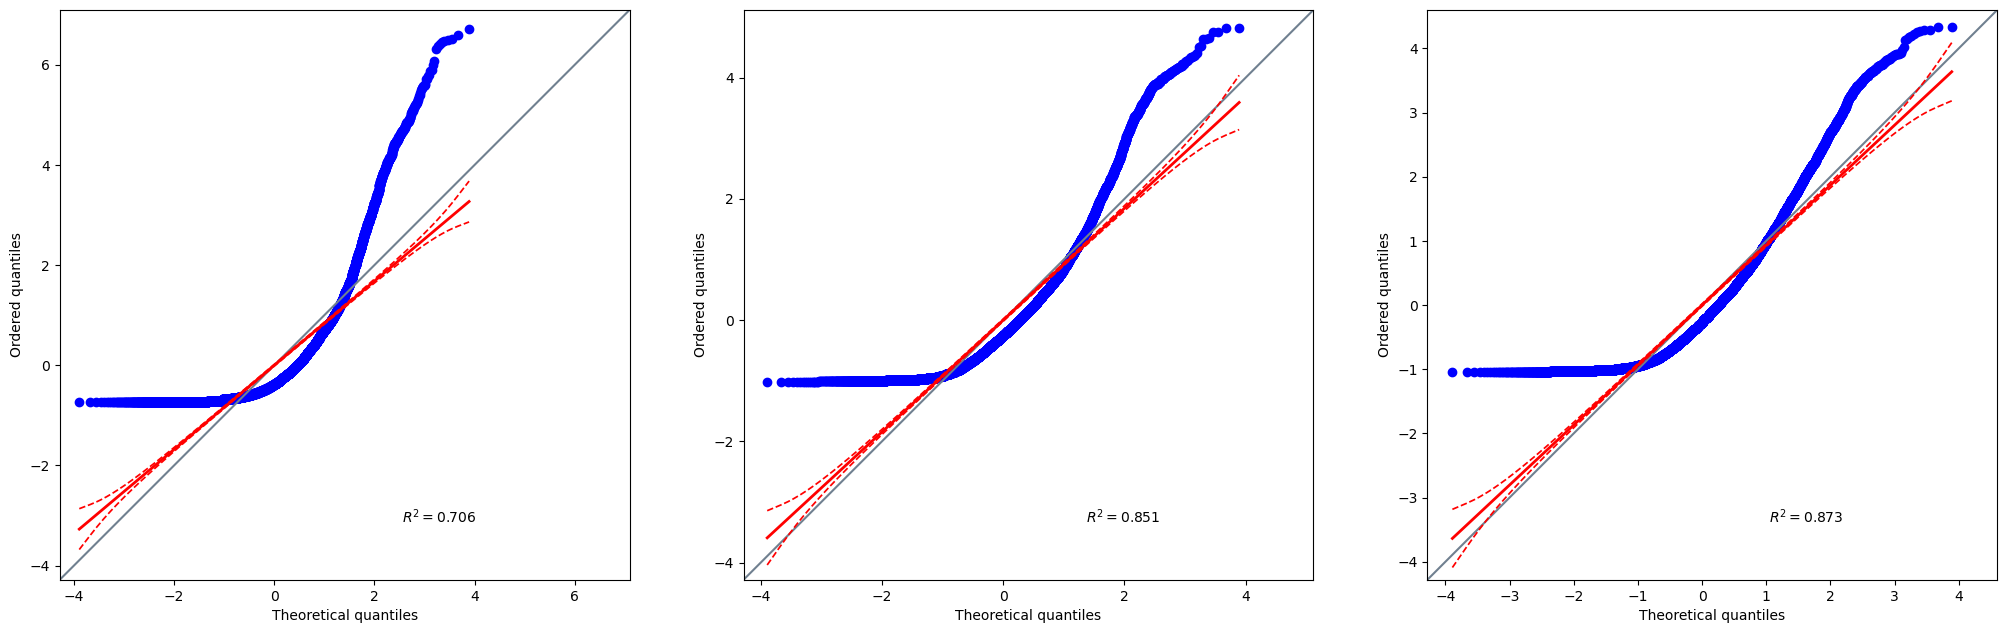

In [12]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
pg.qqplot(train_data.casual,ax=axes[0])
pg.qqplot(train_data.registered,ax=axes[1])
pg.qqplot(train_data.cnt,ax=axes[2])

As can be seen they all fall fairly close to an exponential distribution, so the logarithmic scaling will be beneficial to us.

# Feature analysis

# Date

Testing revealed that dteday and some features I tried deriving from it weren't usueful, so its best to just drop it.

In [13]:
train_data.drop('dteday',axis=1,inplace=True)
test_data.drop('dteday',axis=1,inplace=True)

train_data.head()

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10193,10194,1,True,3,19,False,1,True,1,0.26,0.2576,0.53,0.2239,6,220,226
17256,17257,1,True,12,21,False,3,True,2,0.30,0.2727,0.87,0.2985,0,20,20
8363,8364,4,False,12,3,False,2,True,2,0.34,0.3636,0.61,0.0000,1,1,2
3298,3299,2,False,5,8,False,0,False,1,0.60,0.5909,0.73,0.0896,29,65,94
11912,11913,2,True,5,13,False,3,True,1,0.72,0.6515,0.42,0.0000,77,273,350


# Season

We will start first with the season feature, it is a categorical feature with values ranging from 1 to 4 to represent the different seasons of the year. 

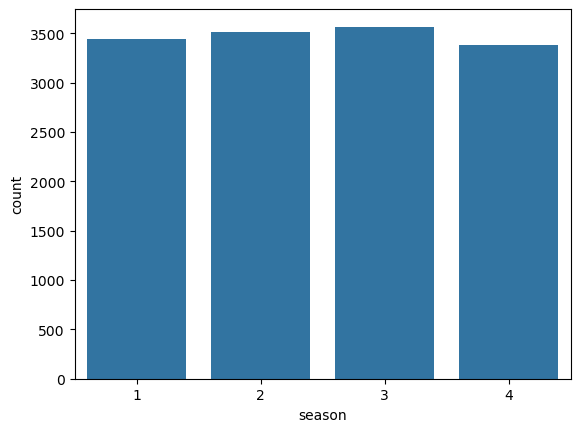

In [14]:
catVisualisation("season")

As can be seen, all of our different categories seem to have a similar number of entries represented, so that will not be a problem. Using common sense, we can predict that season is probably very closely related to temperature and humidity, other two features that we have in our dataset, we can do some visualizations to confirm that.

<Axes: xlabel='hum', ylabel='season'>

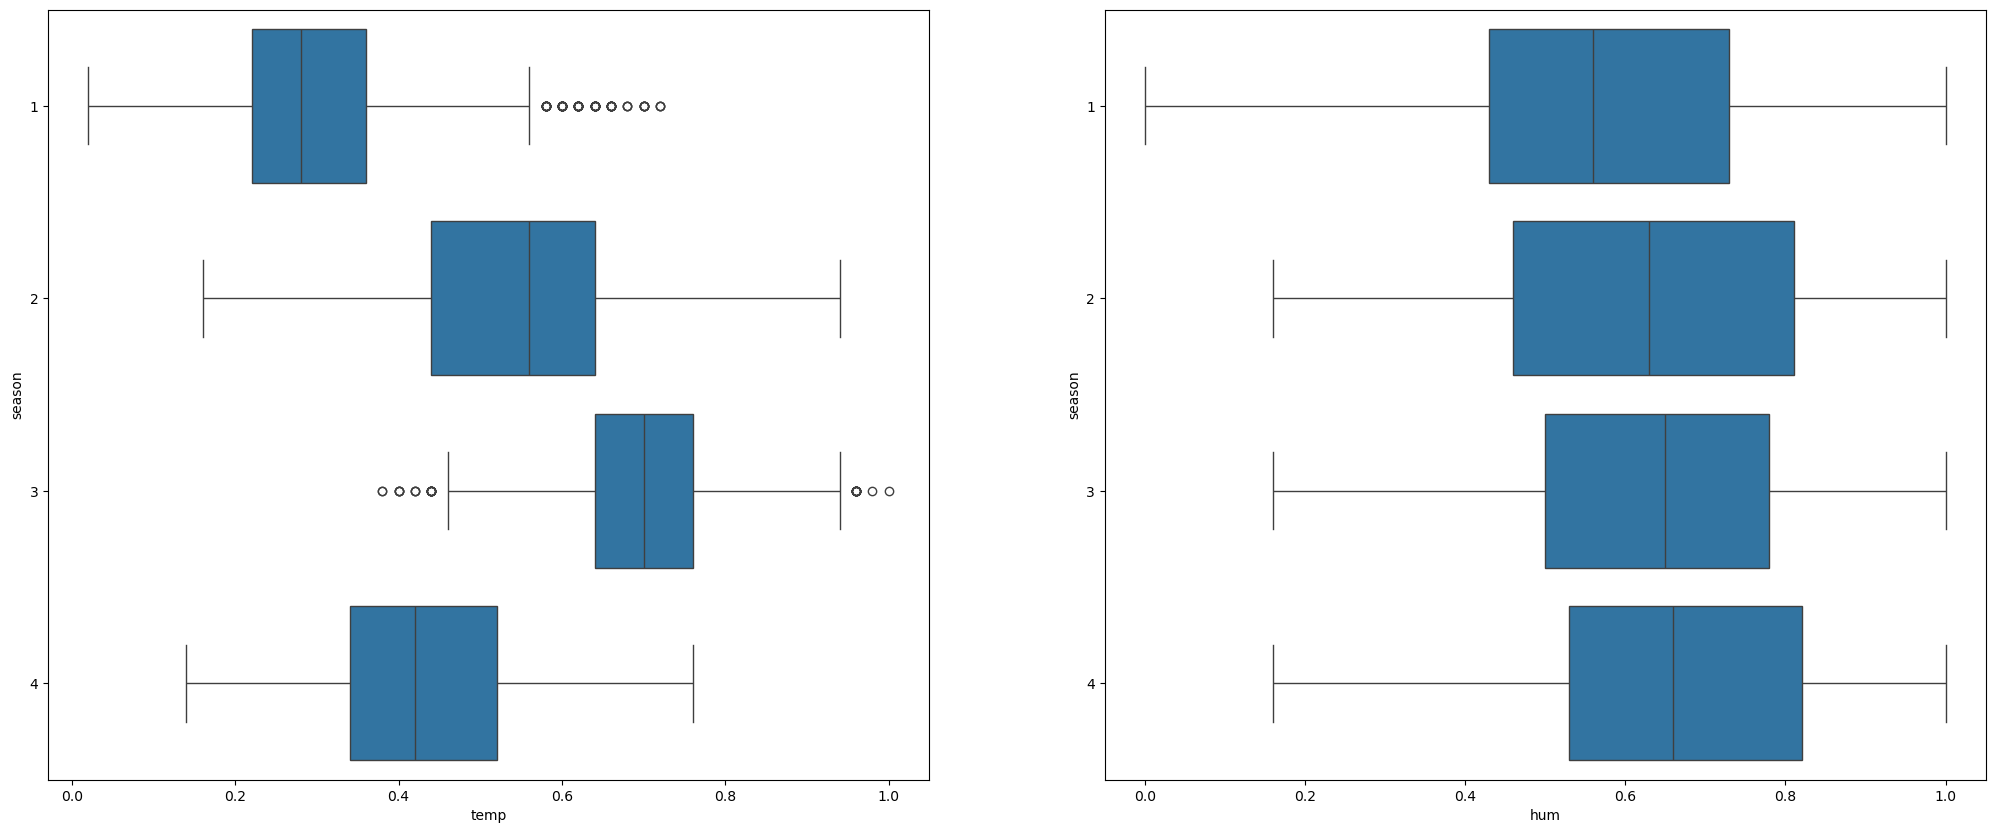

In [15]:
fig, axes = plt.subplots(1,2, figsize=(25, 10))
sns.boxplot(train_data,x="temp",y="season",ax=axes[0],orient='h')
sns.boxplot(train_data,x="hum",y="season",ax=axes[1],orient='h')

As expected there seems to be a decent correlation between them, we will further verify that later with the correlation matrix, that indicates to us that they should not be included together in our model, even if both seem like good predictors, so as to not overrepresent any feature, we can proceed to seeing the realtionship between this feature and our targets.

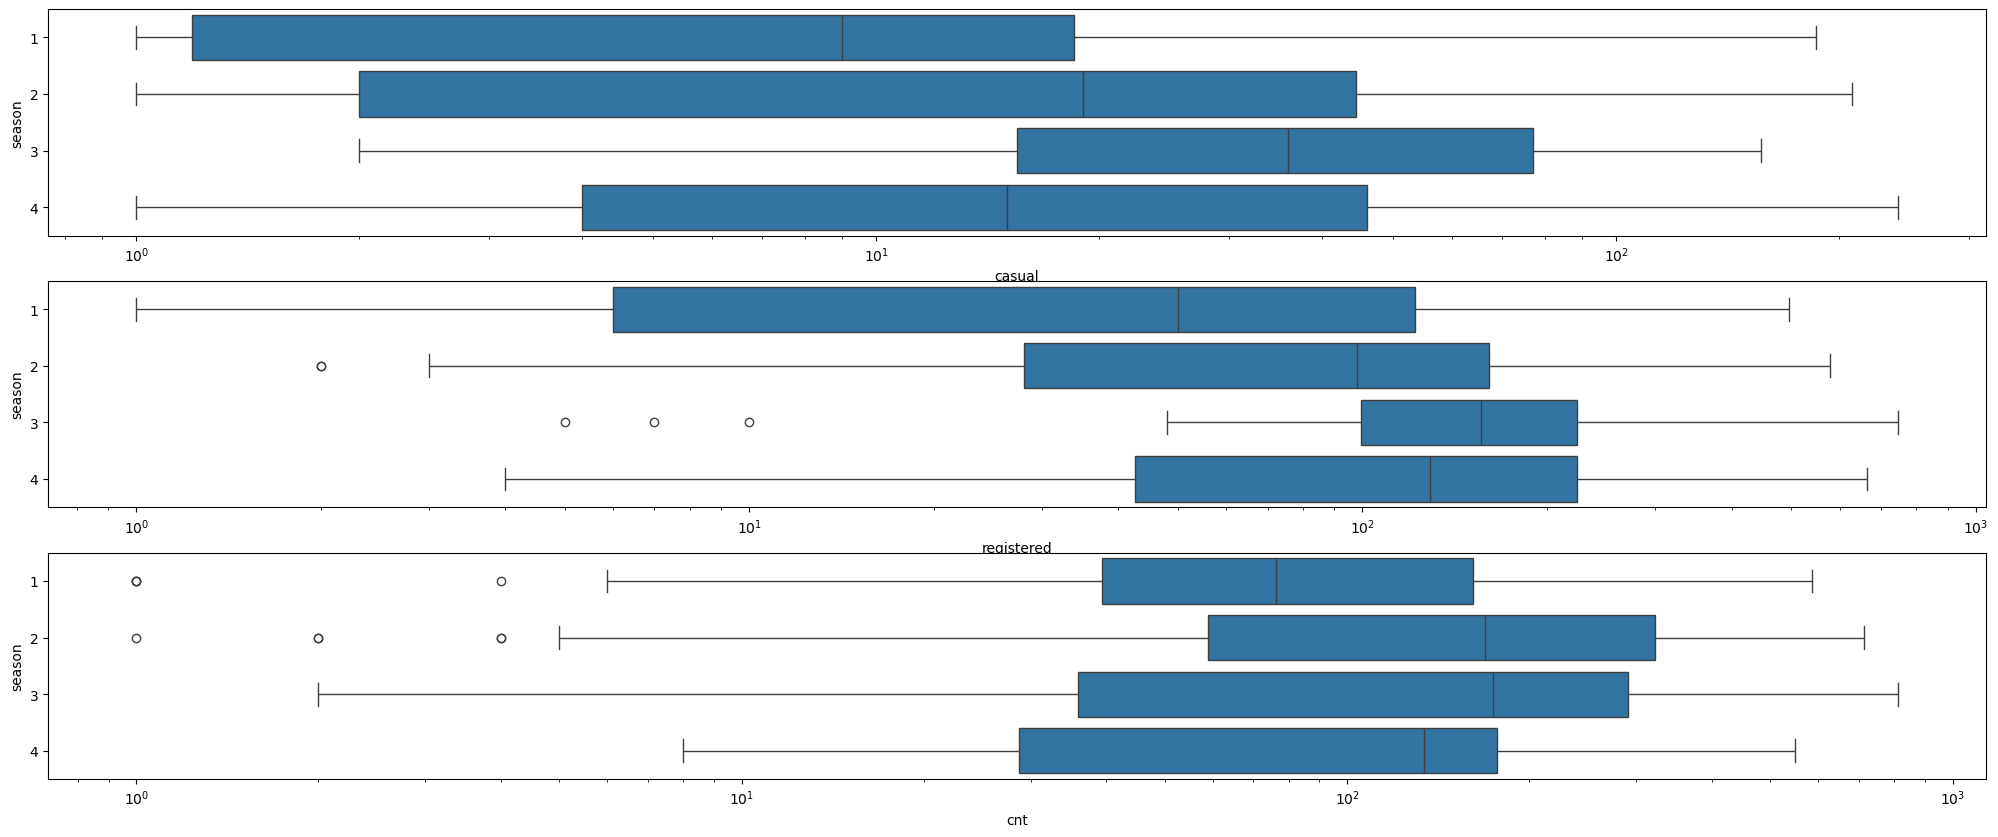

In [16]:
catVisualisationTgt('season')

There seems to be a decent relationship between the target and all features, but we need to be careful if including it in our model, for the reasons previously discussed.

# Is_yr_one

We will now analyze our is_yr_one feature, it is a boolean feature that tells us if the rental was made in year one or not.

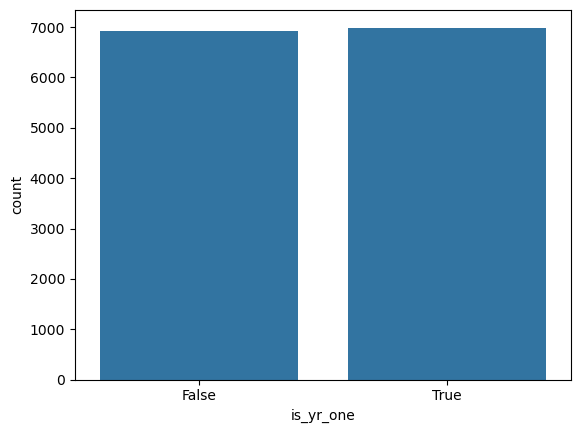

In [17]:
catVisualisation("is_yr_one")

As expected, it is a fairly simple feature with close to equal representation, for now there aren't many other features that seem like they would be related to is_yr_one, but we will further verify it later, for now we will take a look at its relationship to our targets.

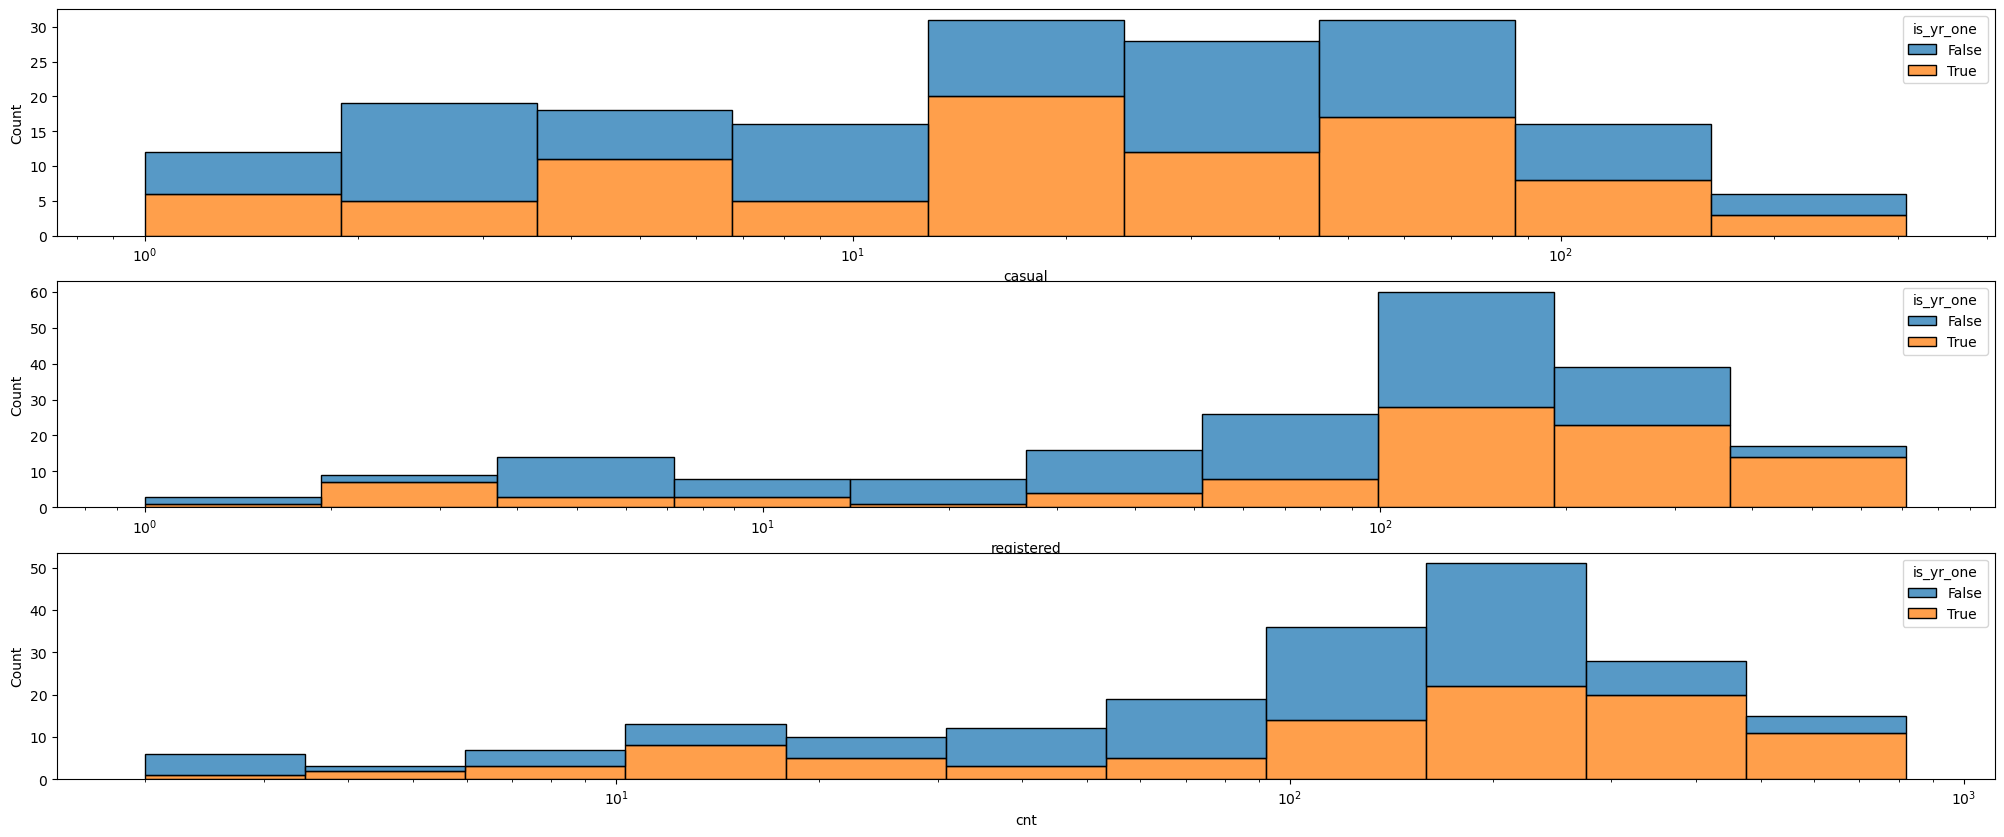

In [18]:
boolVisualisationTgt('is_yr_one')

There seems like there could be a slight correlation with year one having a few more hours with extremely high traffic, but it's hard to tell from just the visualisation. The correlation matrix later will help with confirming this later.

# Month

We will now analyze mnth, it is a categorical feature with values from 1 to 12 representing each of the months of the year, for now it is encoded as a numerical feature, that is known as integer encoded, that can be easily changed later depending if we deem it necessary.

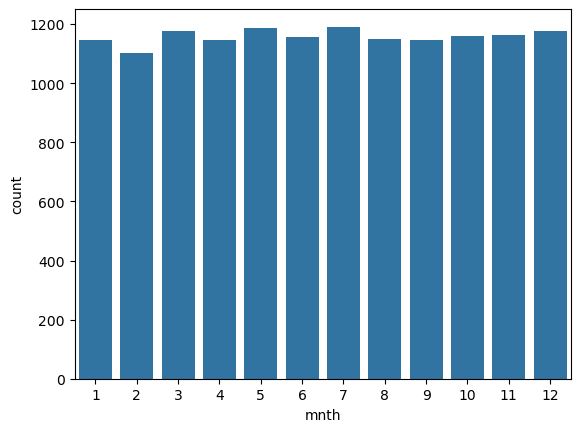

In [19]:
catVisualisation('mnth')

Again our feature is well distibuted with roughly equal representation for every category.

We can now check the relationship to our targets.

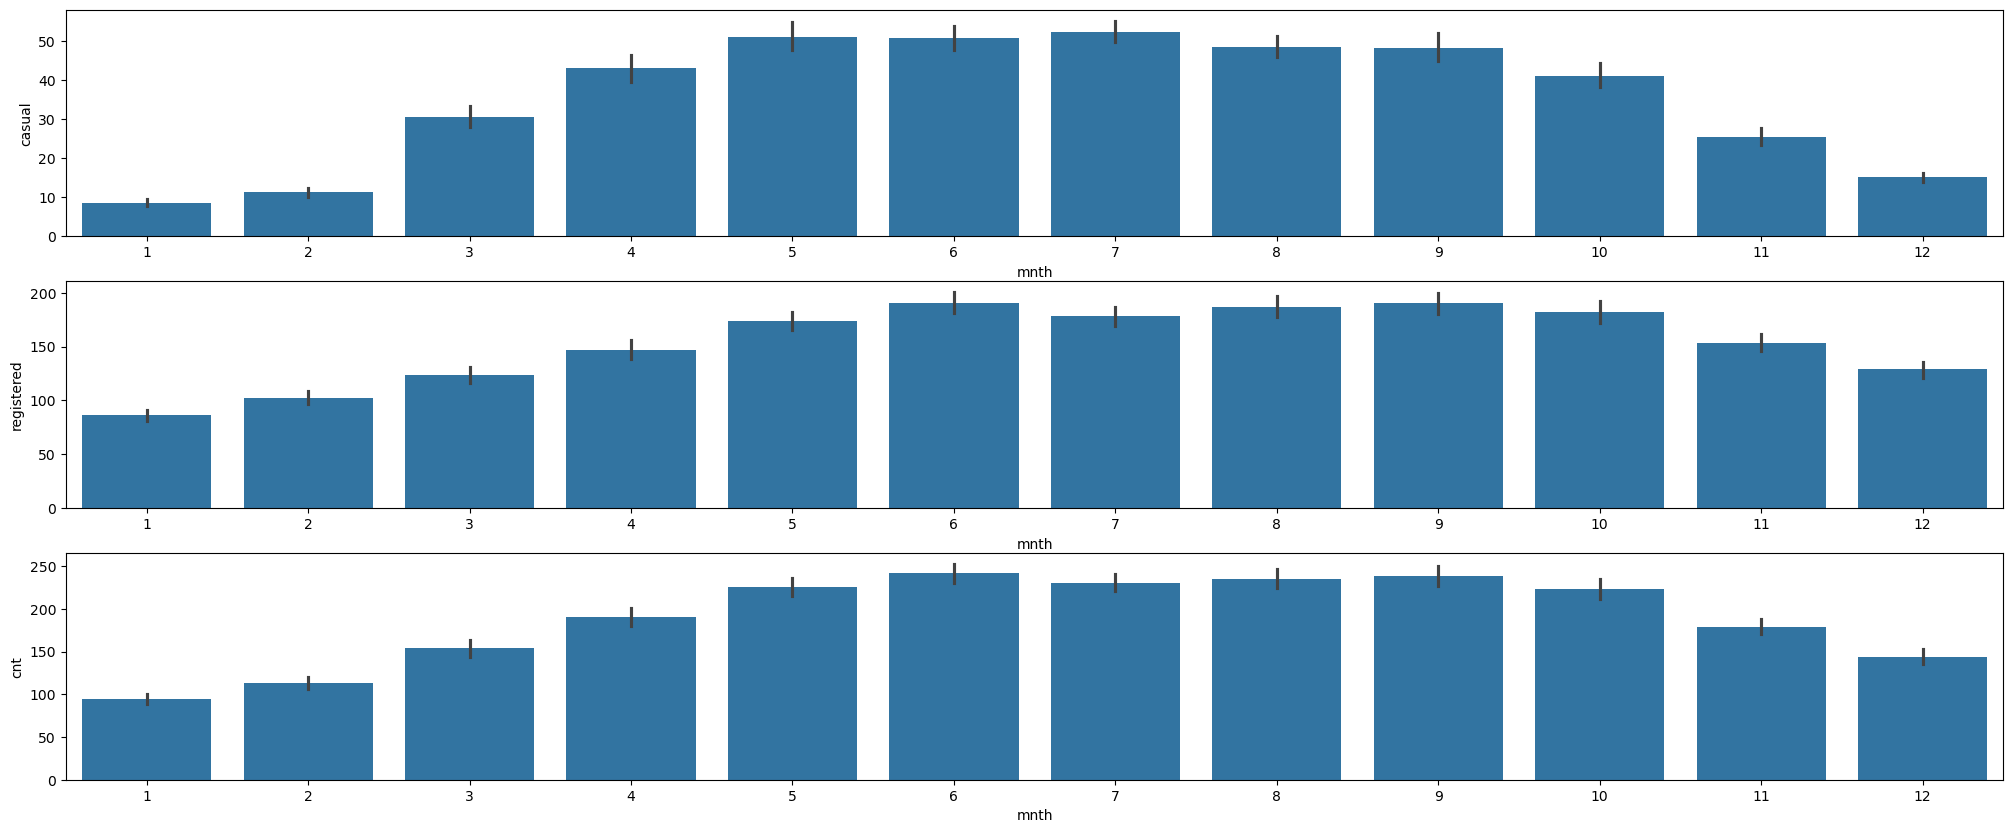

In [20]:
XLcatVisualisationTgt('mnth')

There is definitely a relationship between month and our targets, this indicates to us that month can be a good feature to include in our models. Even if the releationship is not linear, there are ways of using features with nonlinear relationships in linear regression, which we will discuss later.

# Hour

Hour ('hr') is an integer-encoded categorical feature with values ranging from 0 to 23, indicating what hour of the day was registered.

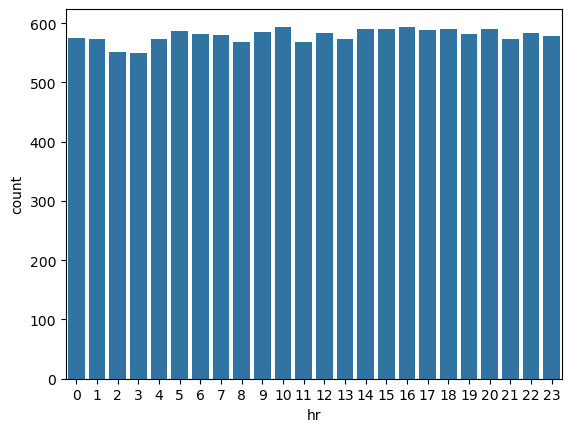

In [21]:
catVisualisation("hr")

The distribution is overall good with a good representation for each category.

We can now proceed to taking a look into the relationship with the target.

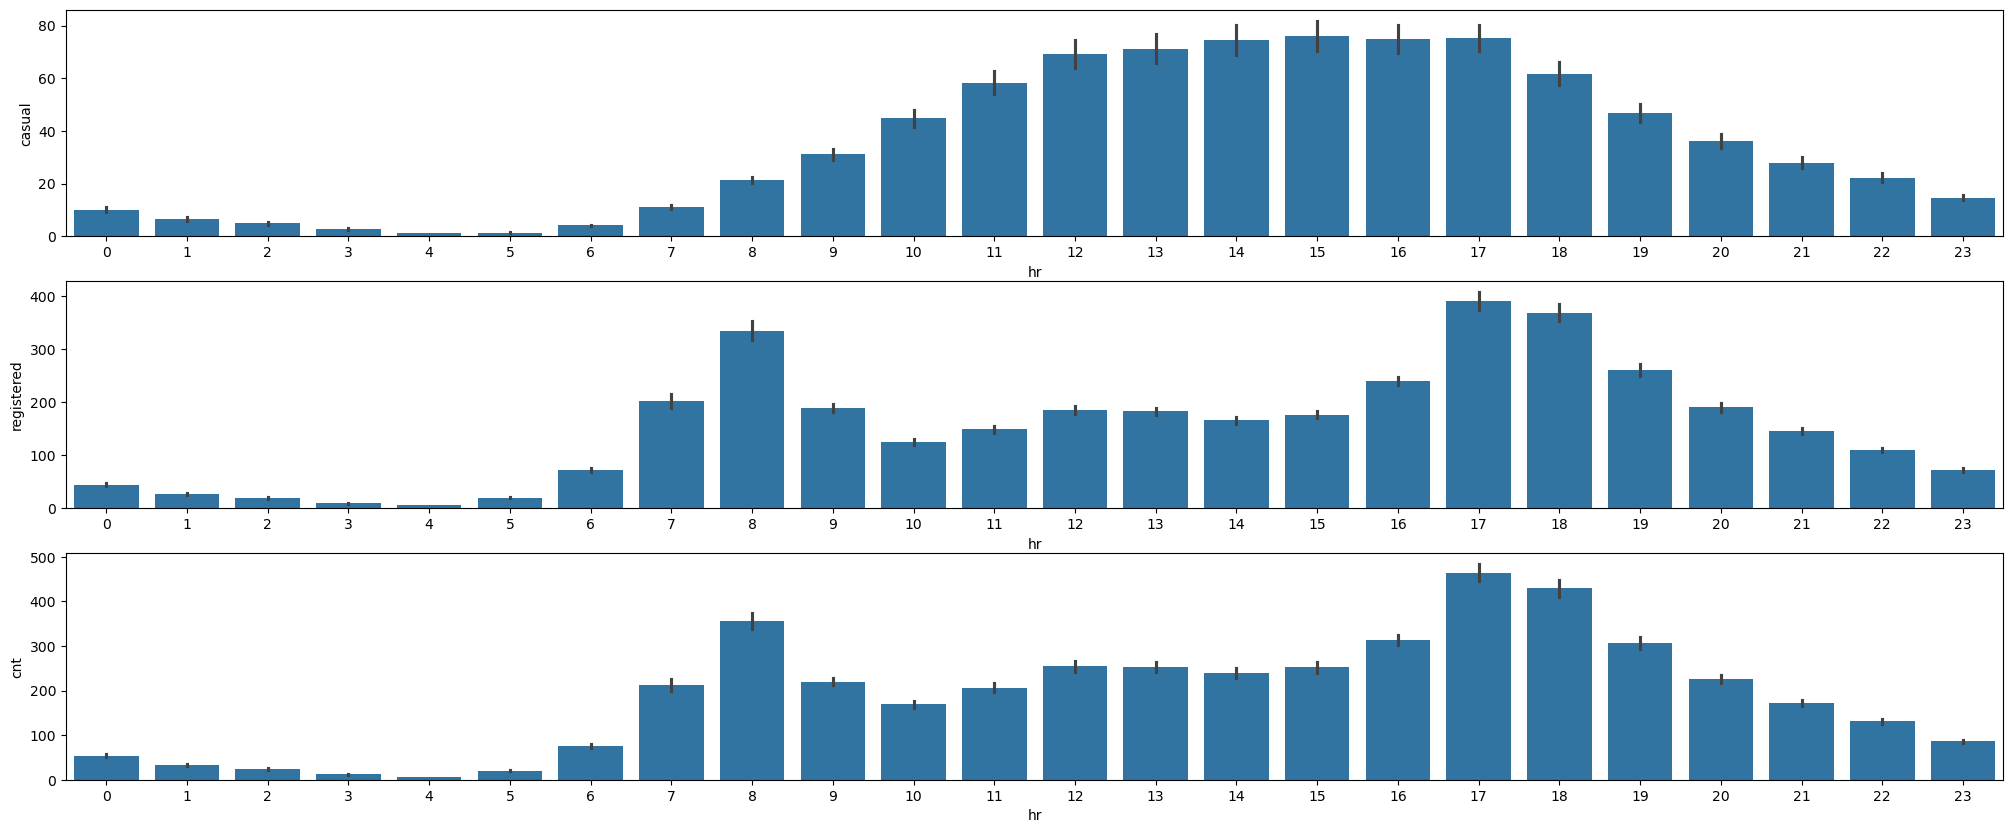

In [22]:
XLcatVisualisationTgt('hr')

For Hour the relationship is a bit more different, but it is still clearly there, especially for registered and total users, but there are still ways of using that data in linear regression.

# Holiday

Holiday is a boolean feature that indicates if the day was or not a holiday.

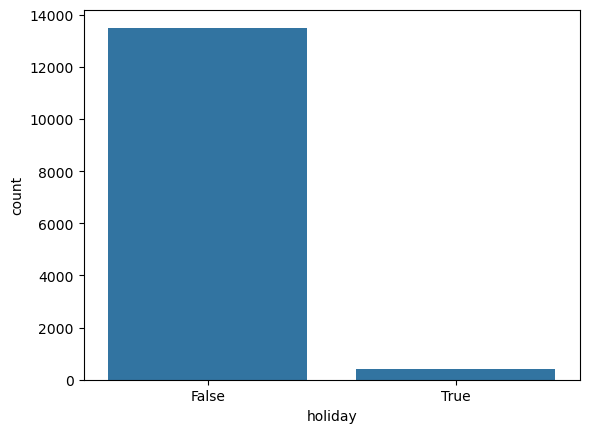

In [23]:
catVisualisation('holiday')

For this feature, the number of True values is way lower than False value, but that should not be a problem.

We can now see the relationship with the targets.

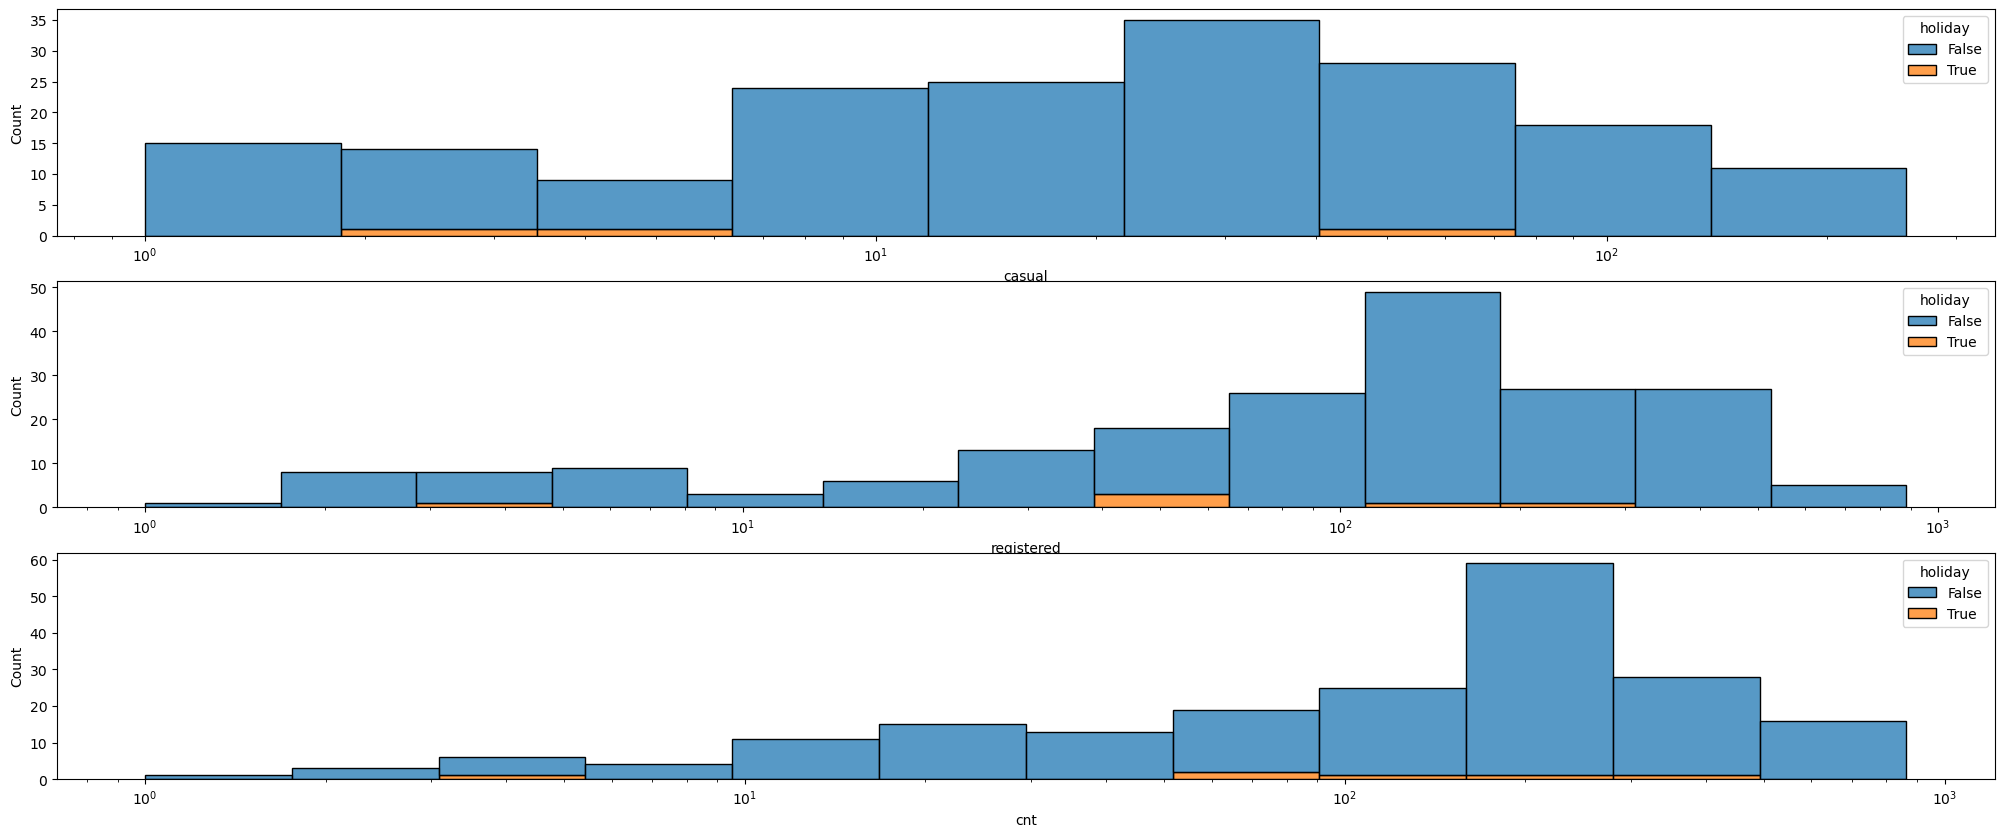

In [24]:
boolVisualisationTgt('holiday')

It is a bit hard to visualise, but there seems to be a larger amount of riders in holidays. We can verify that later with our correlation matrices.

# Weekday

Weekday is a categorical feature, with values ranging from 0 to 6 representing the days of the week.

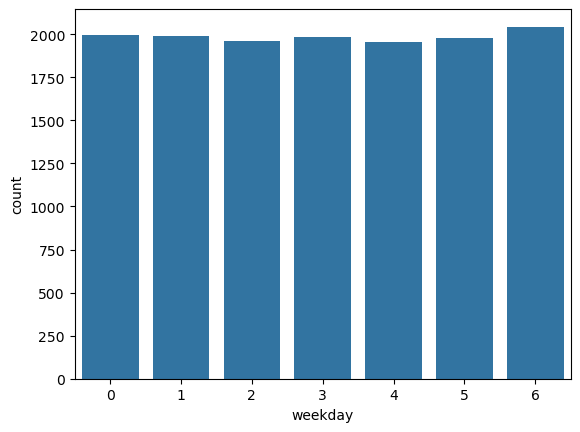

In [25]:
catVisualisation('weekday')

There seems to be a roughly equal distribution, with all weekdays having a bit less than 2000 entries.

Now to visualise the relationship with the targets.

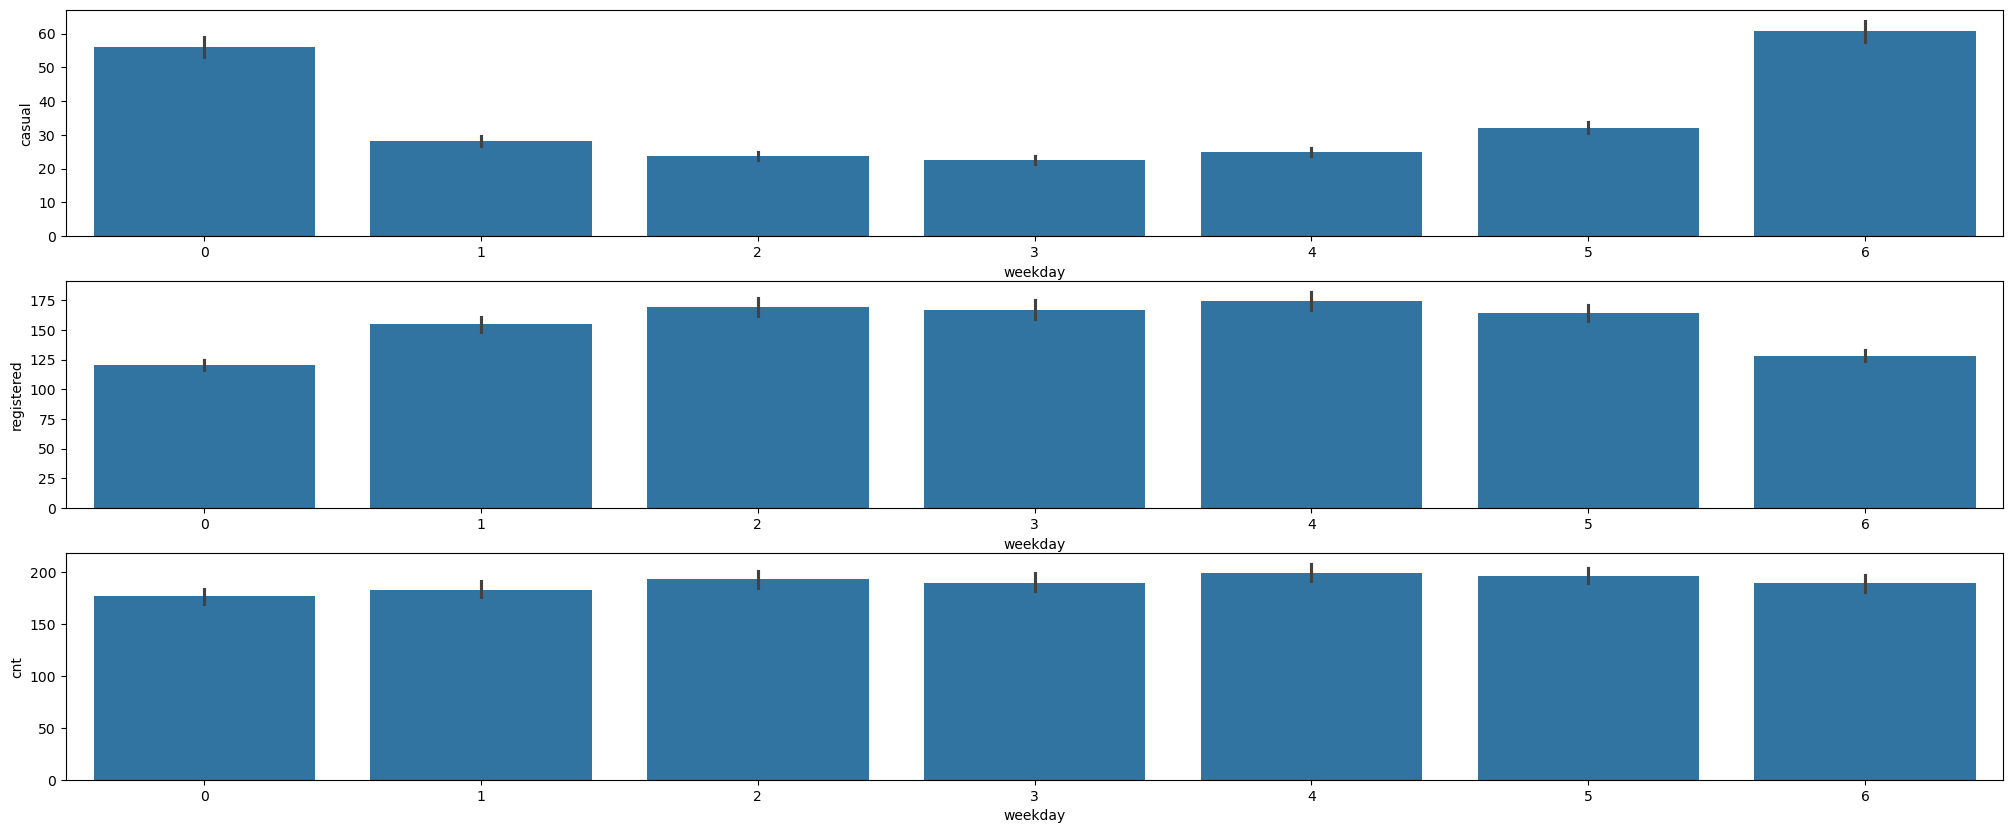

In [26]:
XLcatVisualisationTgt('weekday')

The overall relationship seems to be inverted for casual and registered users, with higher numbers of casual users on days 0 and 6, being Sunday and Saturday, the two days of the weekend, and for registered users the trend is the opposite with more users during the week; unfortunately, that also results in the total count of users being 'flat' in relation to weekday, not showing a lot of variation due to it.

It seems that one option for including this data in our model is to encode it as a boolean feature that indicates if it is a weekday or not, fortunately our dataset already includes this, which we will analyse next.

# Workingday

Workingday is a boolean feature that indicates to us if the day where the measurement was taken was a workday or not.

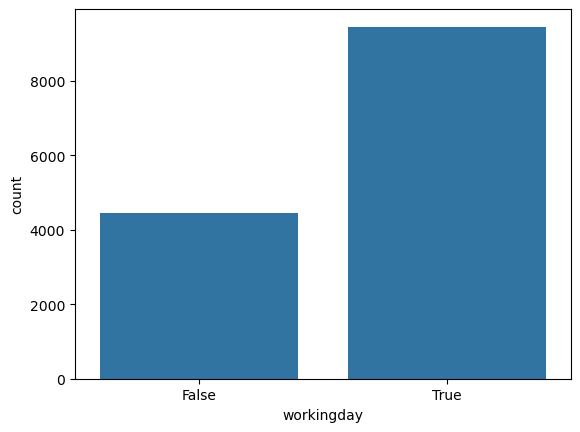

In [27]:
catVisualisation('workingday')

The distribution is as expected with more True observations than false, but that should not be a problem.

We can take a look at its relationship to the targets now, to see if deriving that information from the weekday data was useful to us.

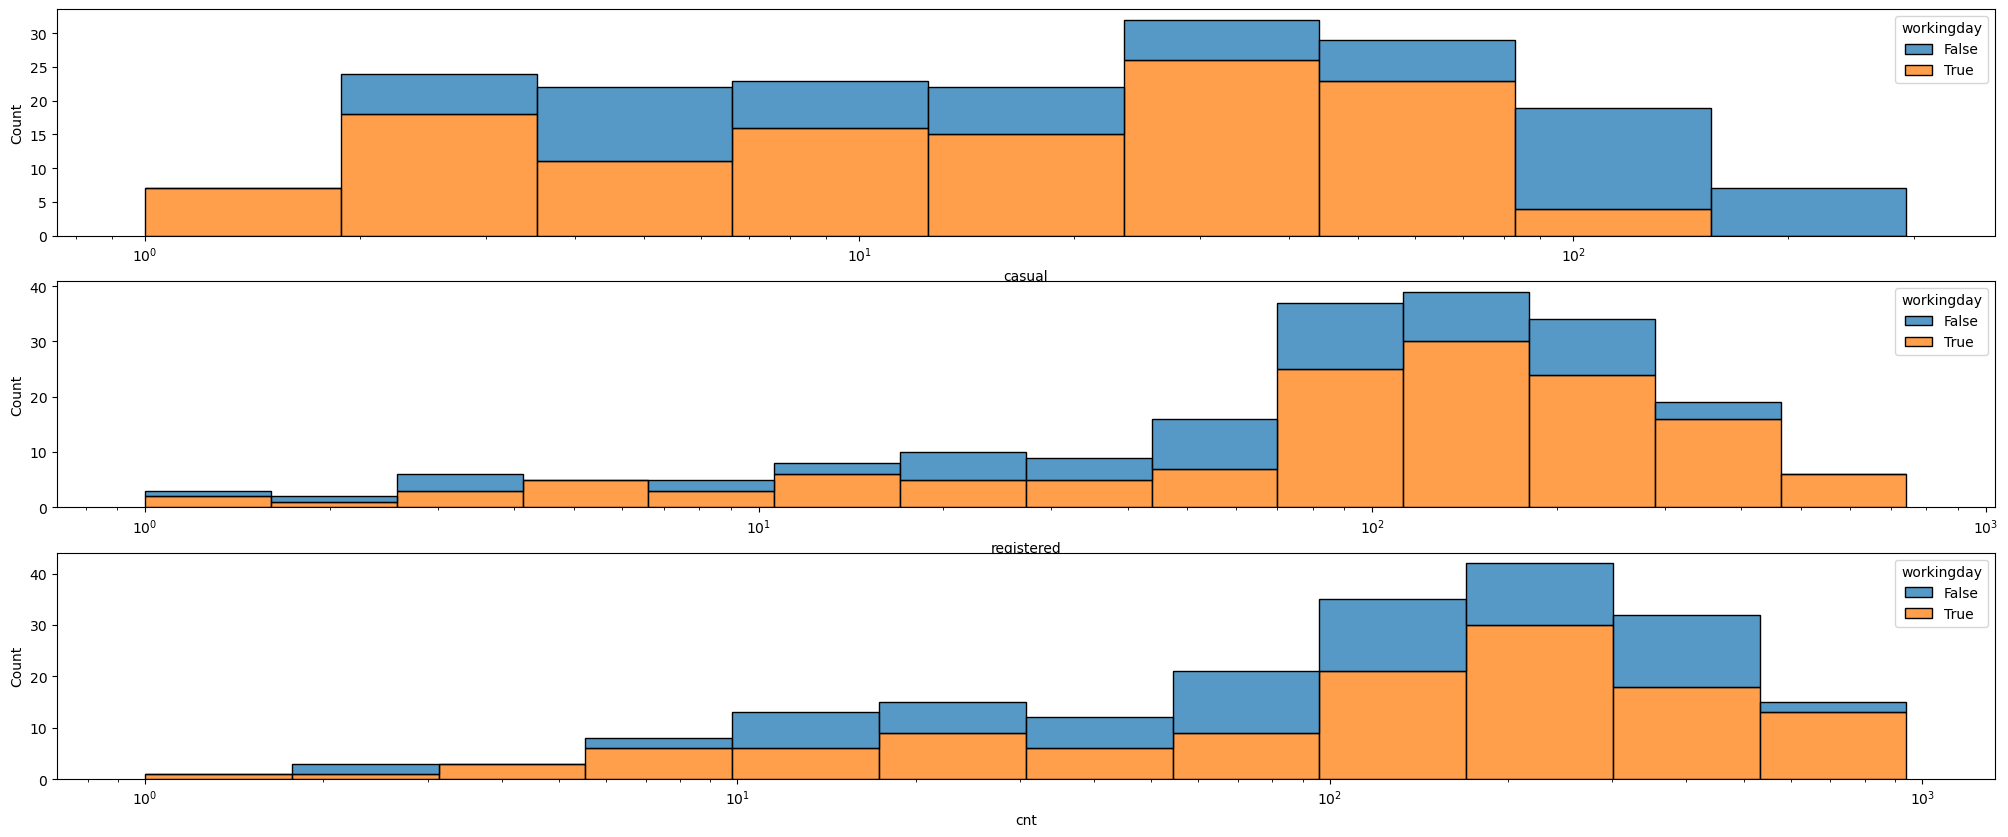

In [28]:
boolVisualisationTgt('workingday')

As expected, there seems to be more False values with higher entries for casual users. Additionally, for registered users the relationship seems to be the opposite, which confirms our earlier observations, there also doesn't seem to be a strong relationship between it and the total count, as we observed earlier

# Weather situation

Weathersit is an integer-encoded categorical feature that indicates what the weather was like when the measurement was taken.

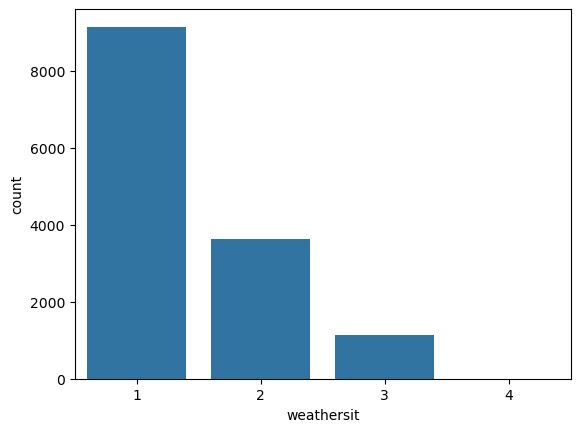

In [29]:
catVisualisation('weathersit')

There seems to be a smaller number of observations for 'higher' values of weathersit, but that should not be a problem.

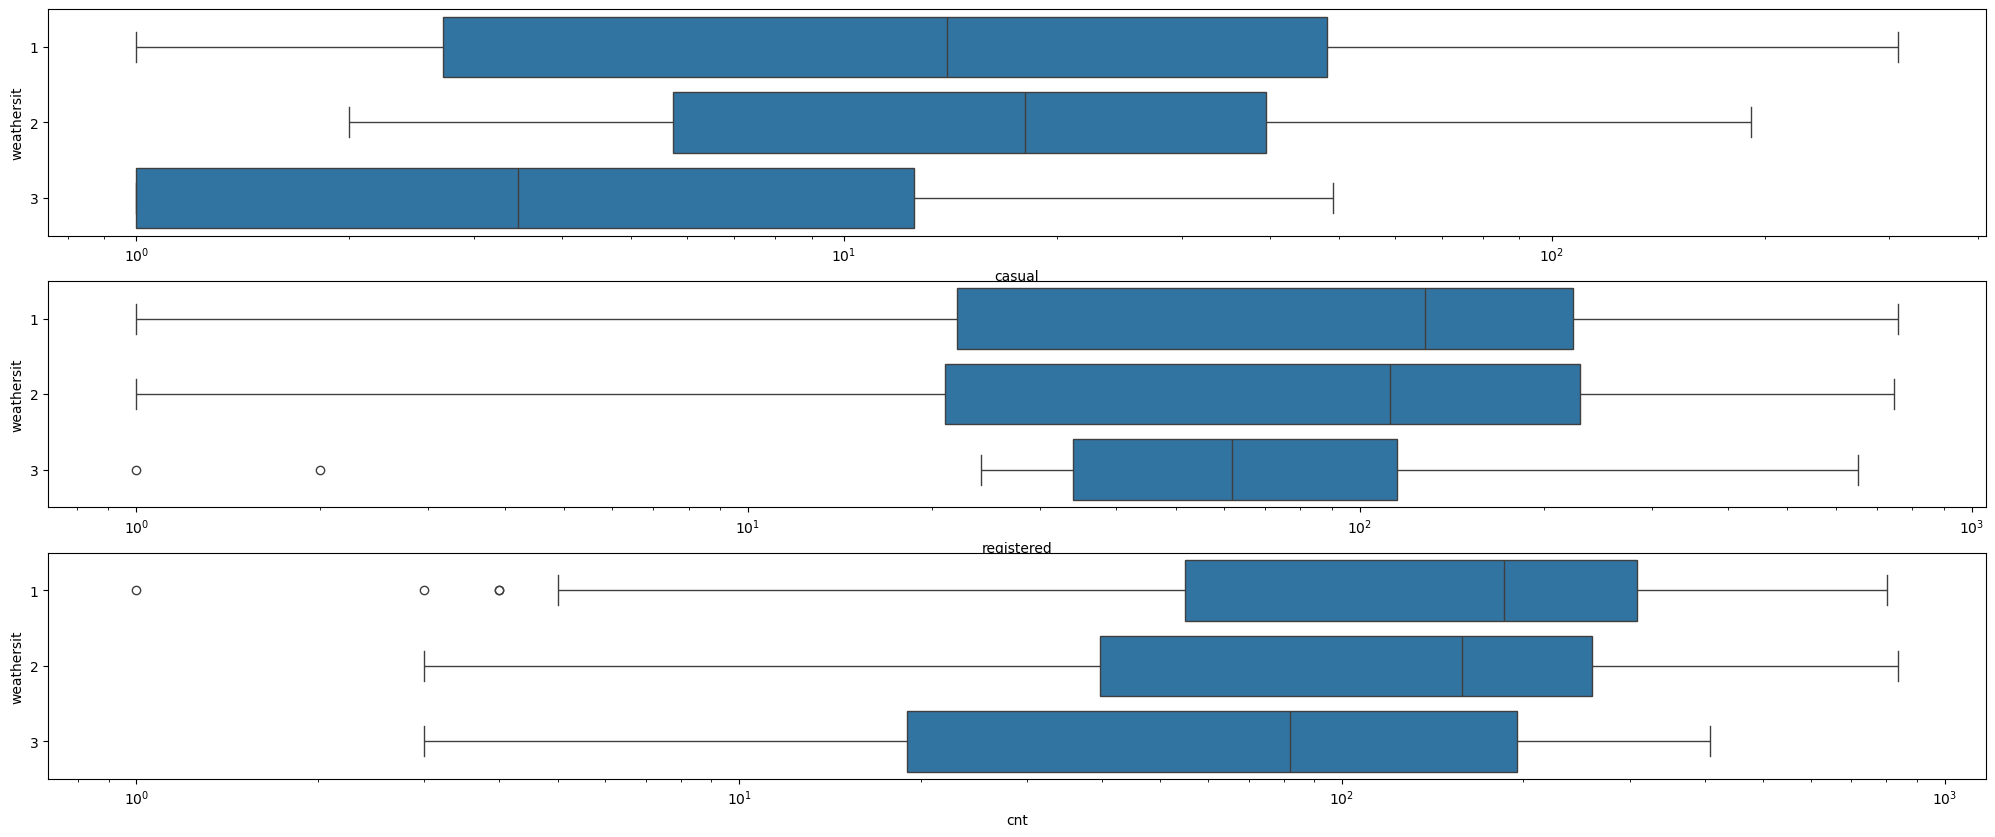

In [30]:
catVisualisationTgt('weathersit') # there are very few entries with value 4 so due to sampling we will most likely not get them in our visualisations

There seems to be an overall inverse linear relationship with the targets, with more riders on lower values of weather, that makes sense, as epople are less likely to take a bike during more extreme weather.

We can use a regplot to try and visualise that relationship.

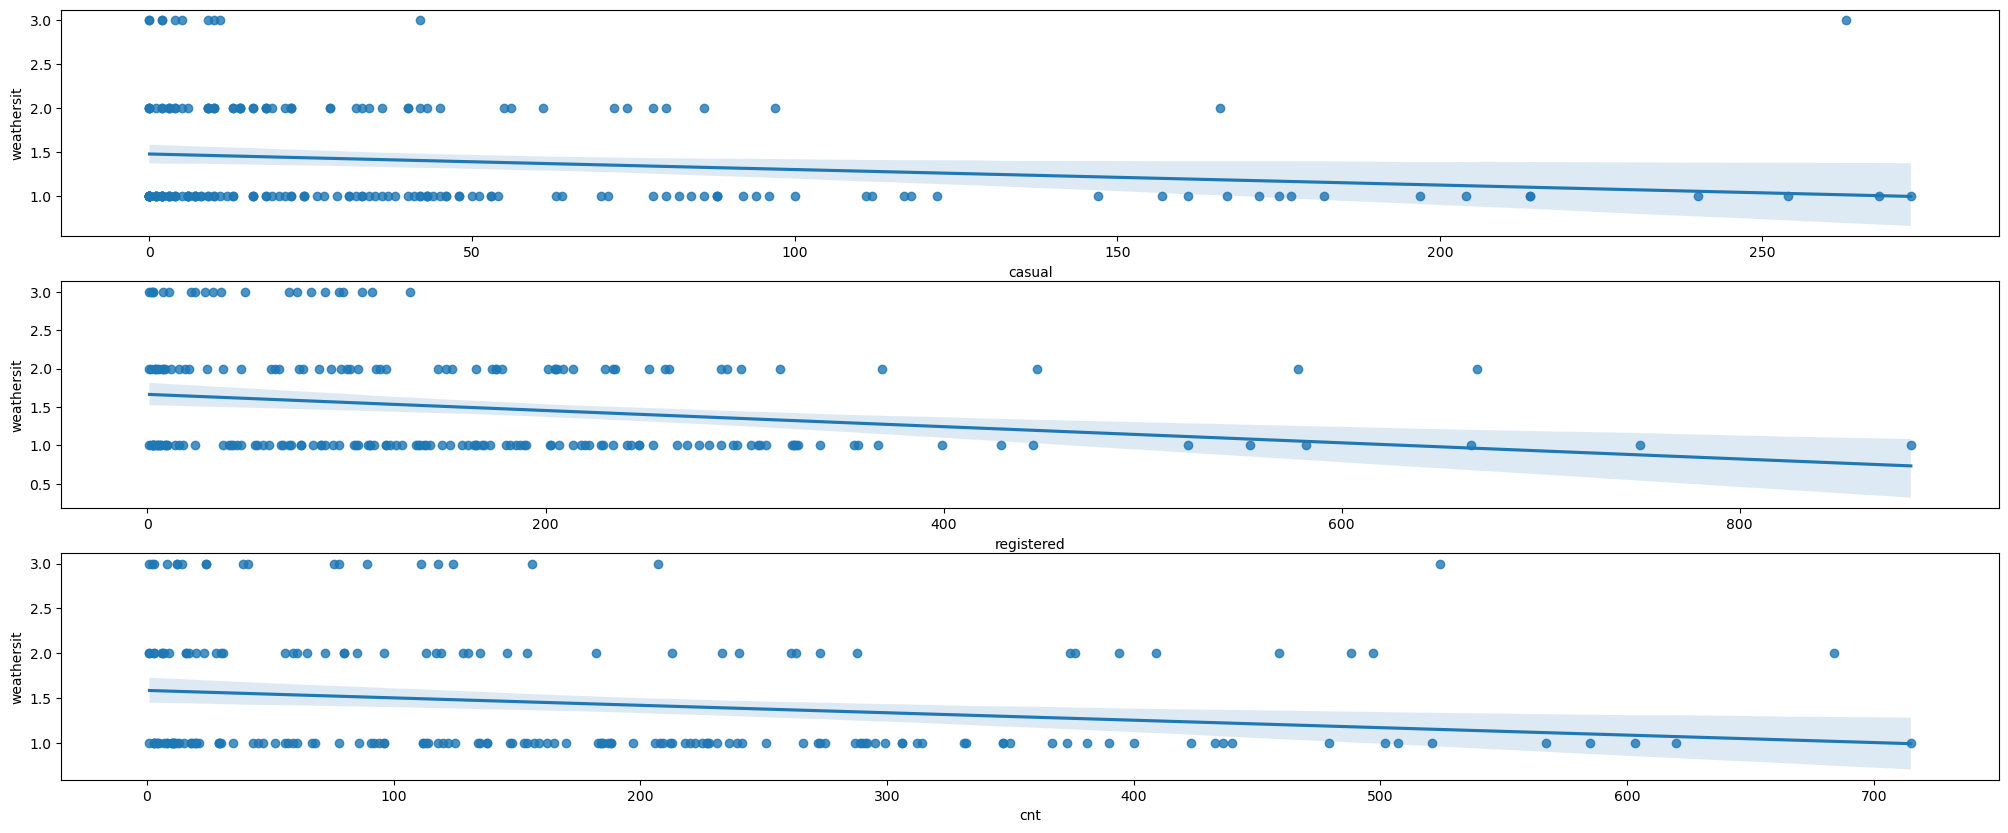

In [31]:
numVisualisationTgt('weathersit')

As can be seem with the regplot that relationship does indeed seem to exist, that indicates to us that weathersit probably is a good feature to include in our models.

# Temperature

Temperature is a numerical feature representing the normalized temperature in Celsius.

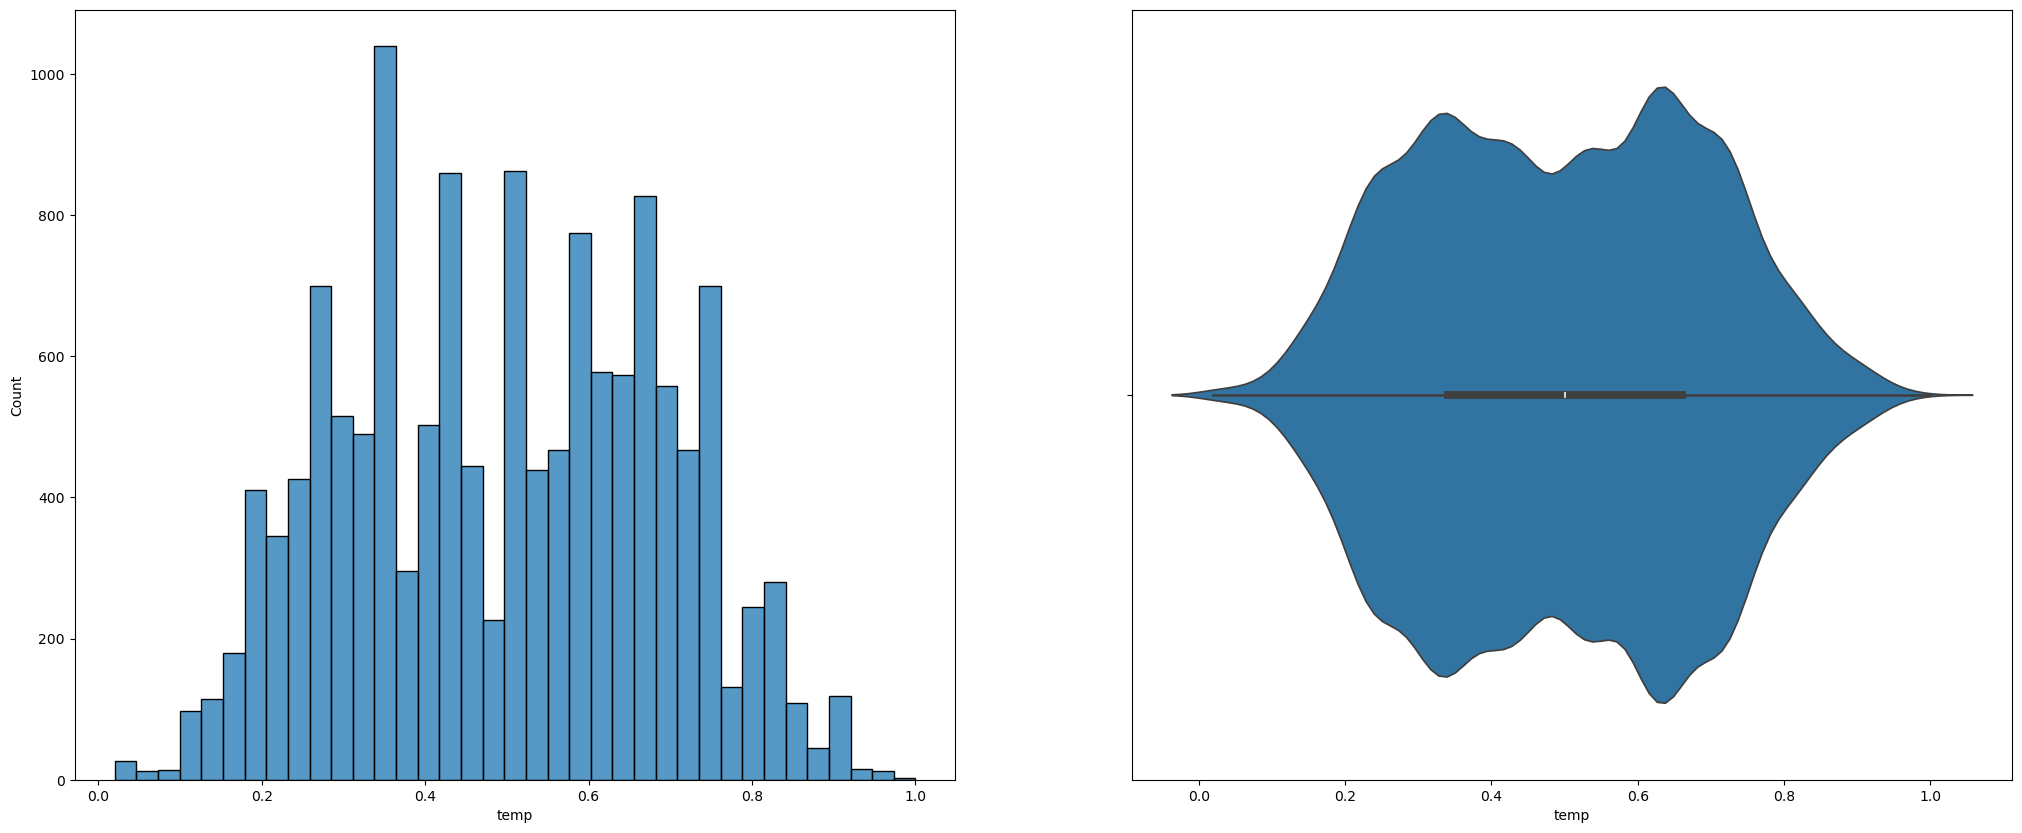

In [32]:
numVisualisation('temp')

The data roughly follows a normal distribution, and there does not seme to be any ouliers, so we can just proceed to visualising the relationship with the targets.

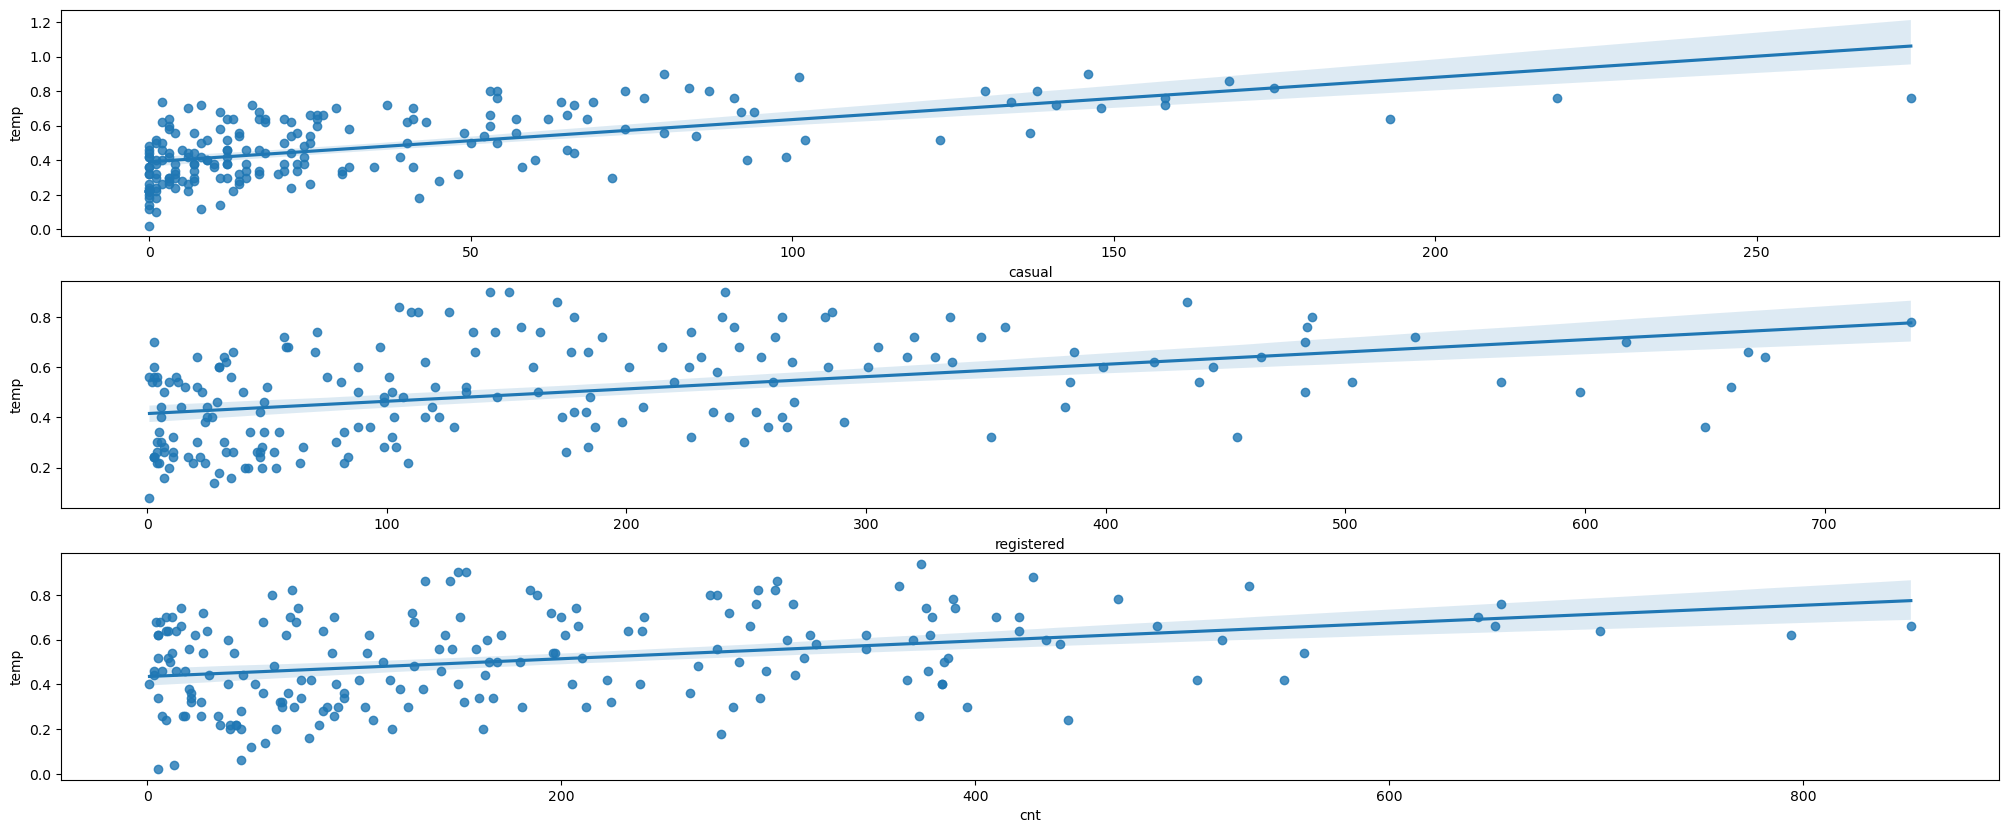

In [33]:
numVisualisationTgt('temp')

This feature seems to have an almost ideal linear relationship to all our targets, that is great and indicates to us that temperature will probably be one of the best predictors in our model, especially the linear regression ones.

# Feeling temperature

Atemp is a numerical feature that represents the normalized feeling temperature in degrees Celsius.

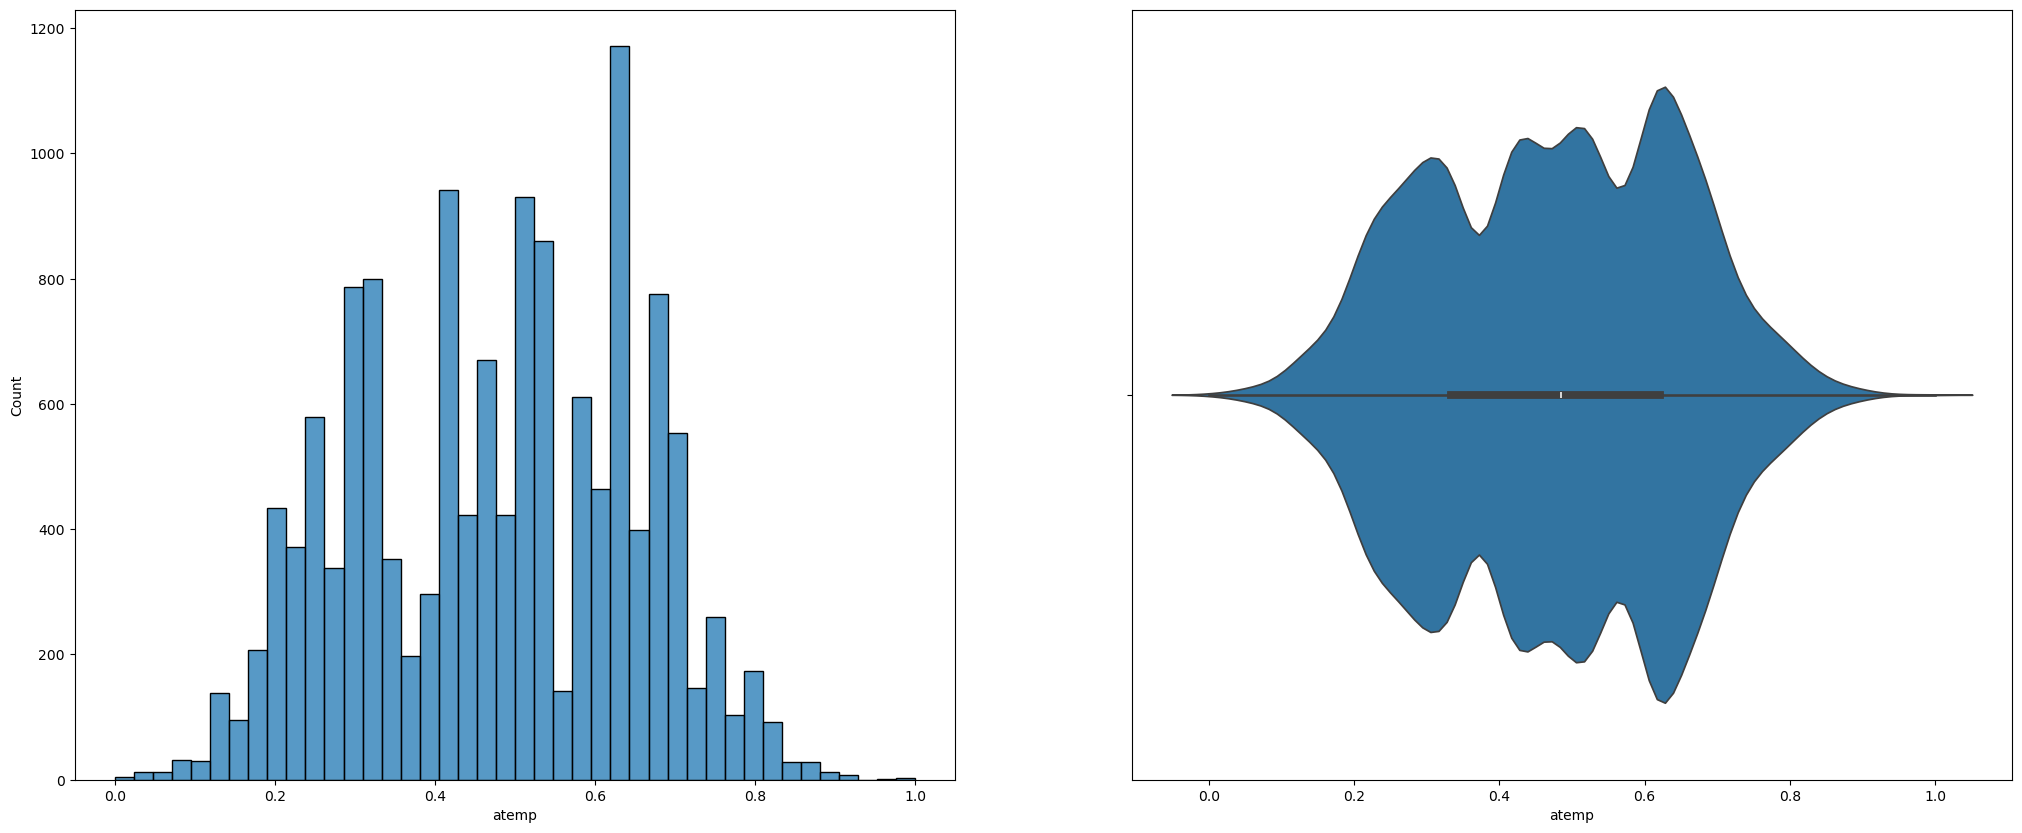

In [34]:
numVisualisation('atemp')

This feature seems to also have a distribution close to normal and no outliers, that is great and means we can just move on to analysing the relationship with the target.

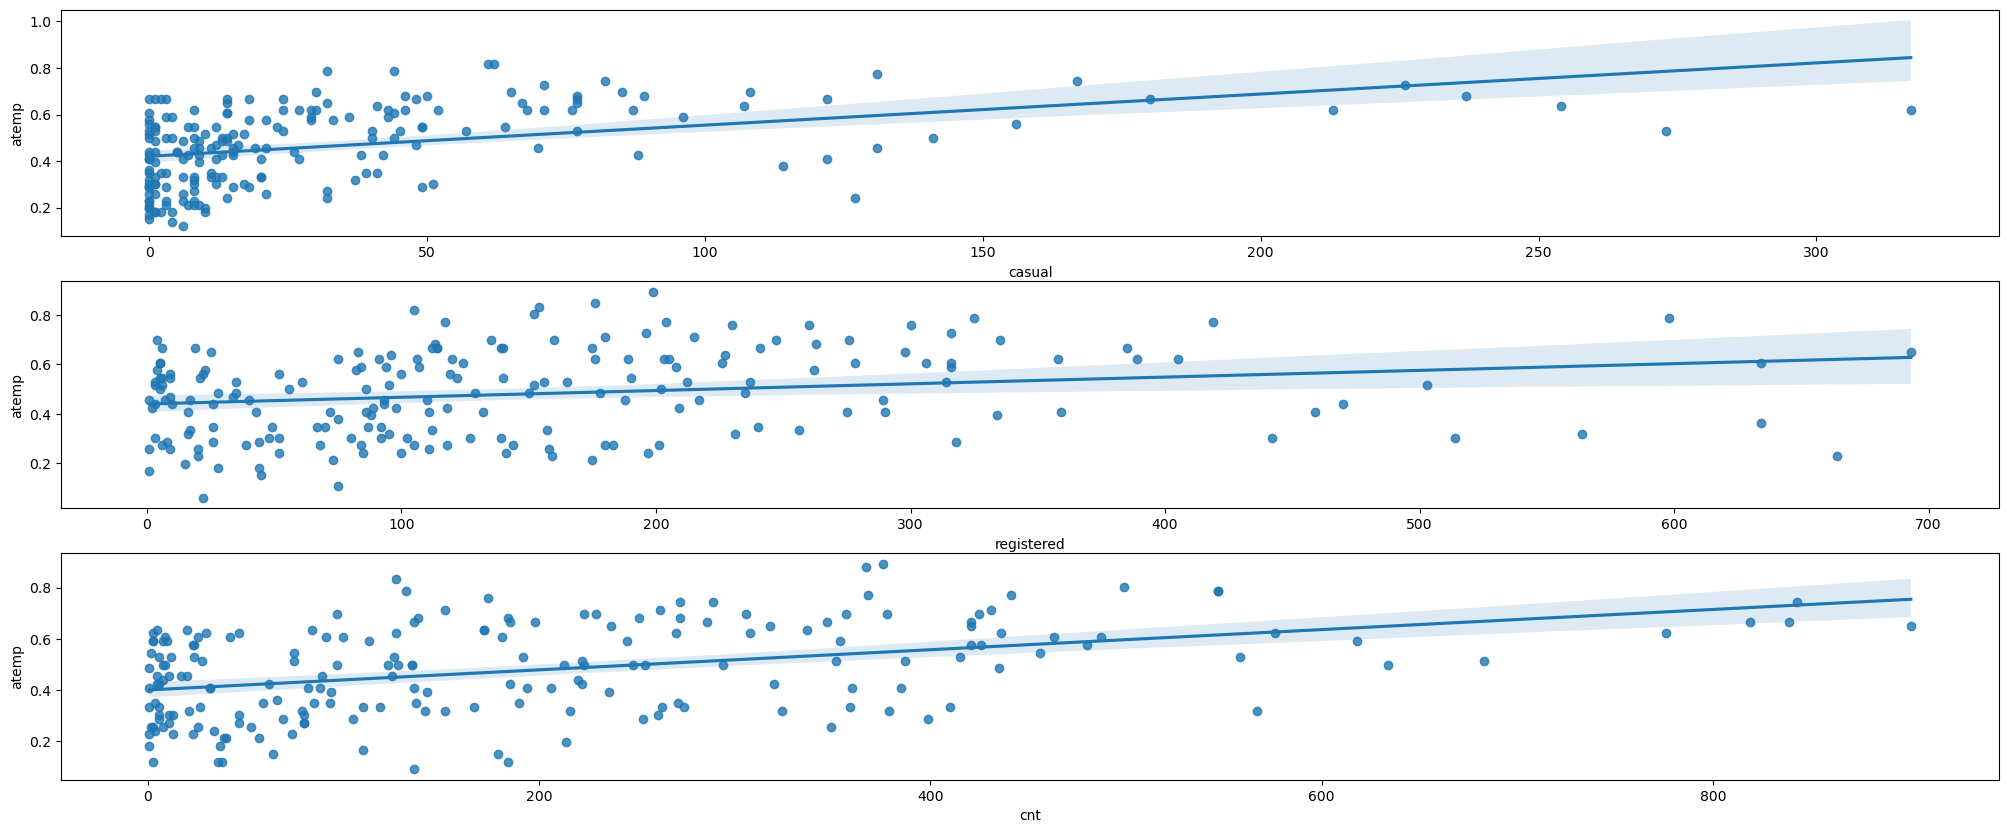

In [35]:
numVisualisationTgt('atemp')

There also seems to be a string linear relationship between atemp and our feature, however it is very likely that it is closely related to temperature, humidity, and windspeed, so we need to check that too.

<Axes: xlabel='windspeed', ylabel='atemp'>

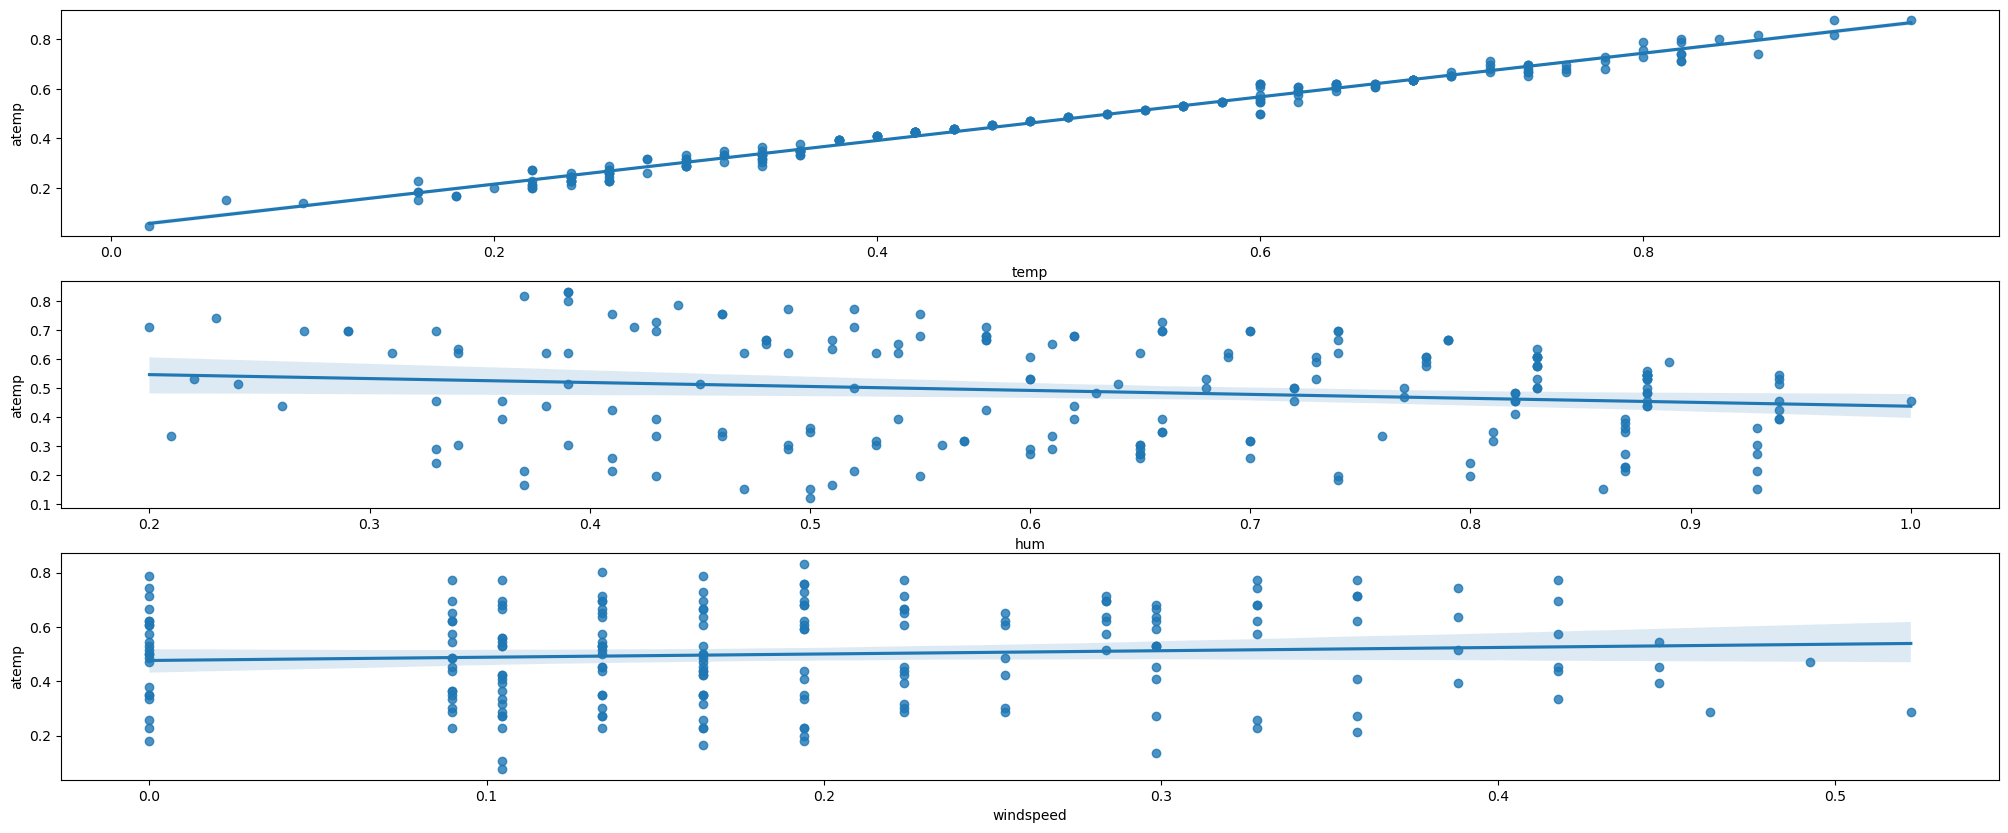

In [36]:
fig, axes = plt.subplots(3,1, figsize=(25, 10))
sns.regplot(data=train_data.sample(200),x='temp',y= 'atemp',ax=axes[0])
sns.regplot(data=train_data.sample(200),x='hum',y= 'atemp',ax=axes[1])
sns.regplot(data=train_data.sample(200),x='windspeed',y= 'atemp',ax=axes[2])

There seems to be an extremely close linear relationship between temp and atemp, that indicates to us that we should not use both of them in the same model as to not overrepresent any feature, however, the relationship with windspeed and humidity is very weak, but still existing, there are ways of dealing with that such as averaging the two values together, but since they are so closely related and report the same data, I decided its best to just drop it from our dataset.

In [37]:
train_data.drop('atemp',axis=1,inplace=True)
test_data.drop('atemp',axis=1,inplace=True)

train_data.head()

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
10193,10194,1,True,3,19,False,1,True,1,0.26,0.53,0.2239,6,220,226
17256,17257,1,True,12,21,False,3,True,2,0.30,0.87,0.2985,0,20,20
8363,8364,4,False,12,3,False,2,True,2,0.34,0.61,0.0000,1,1,2
3298,3299,2,False,5,8,False,0,False,1,0.60,0.73,0.0896,29,65,94
11912,11913,2,True,5,13,False,3,True,1,0.72,0.42,0.0000,77,273,350


# Humidity

Hum is a numerical feature that represents the humidity when the measurement was taken.

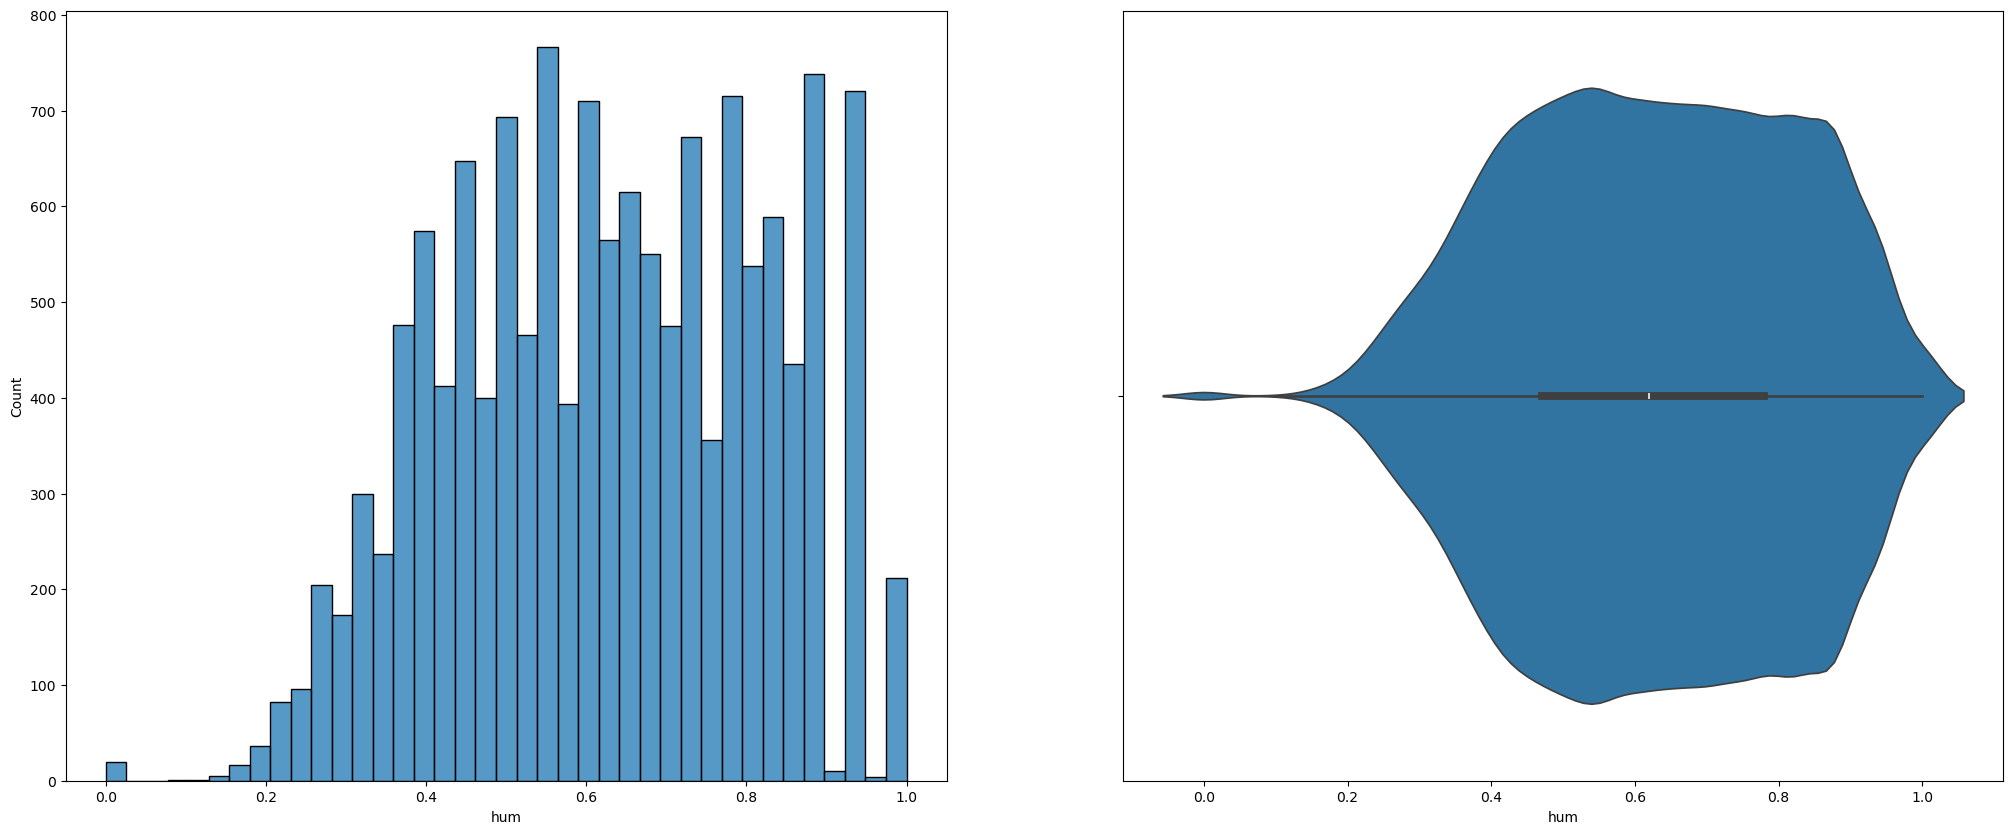

In [38]:
numVisualisation('hum')

The overall distribution seems to be something close to a normal distribution, there aren't any outliers, so we can just proceed to analysing the relationship to the target.

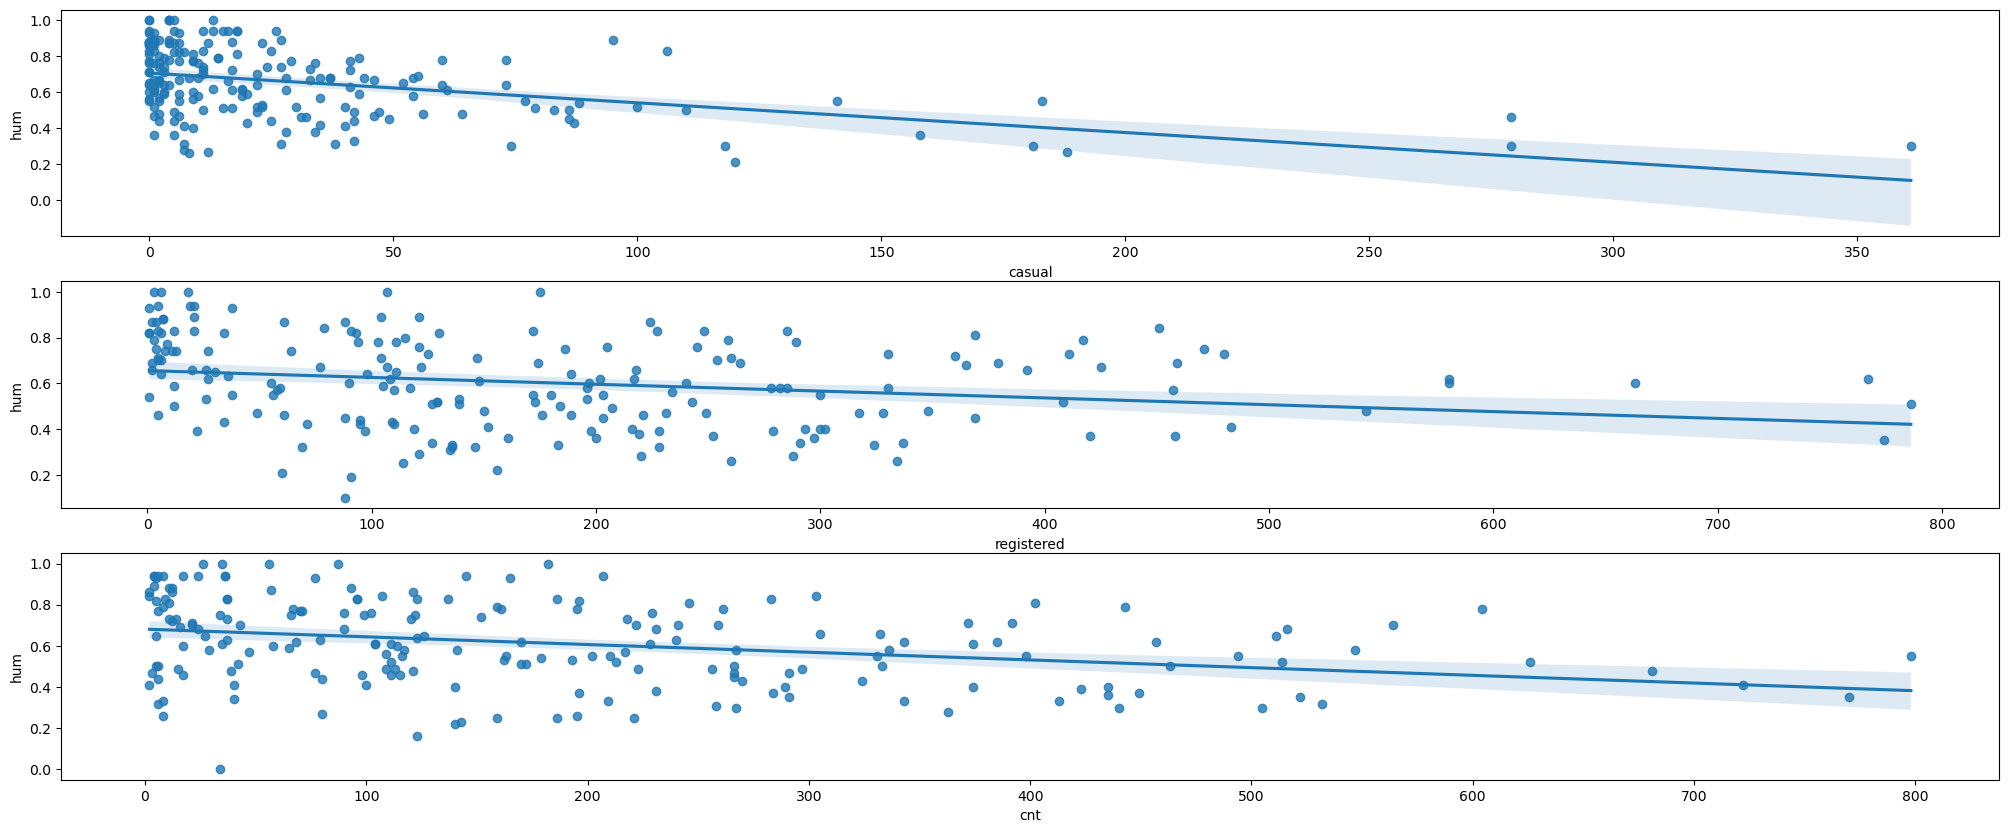

In [39]:
numVisualisationTgt('hum')

There is a very strong linear relationship between hum and our targets, with higher humidity values having lower values for all targets.

# Windspeed

Windspeed is a numerical feature that represents the normalized wind speeds. 

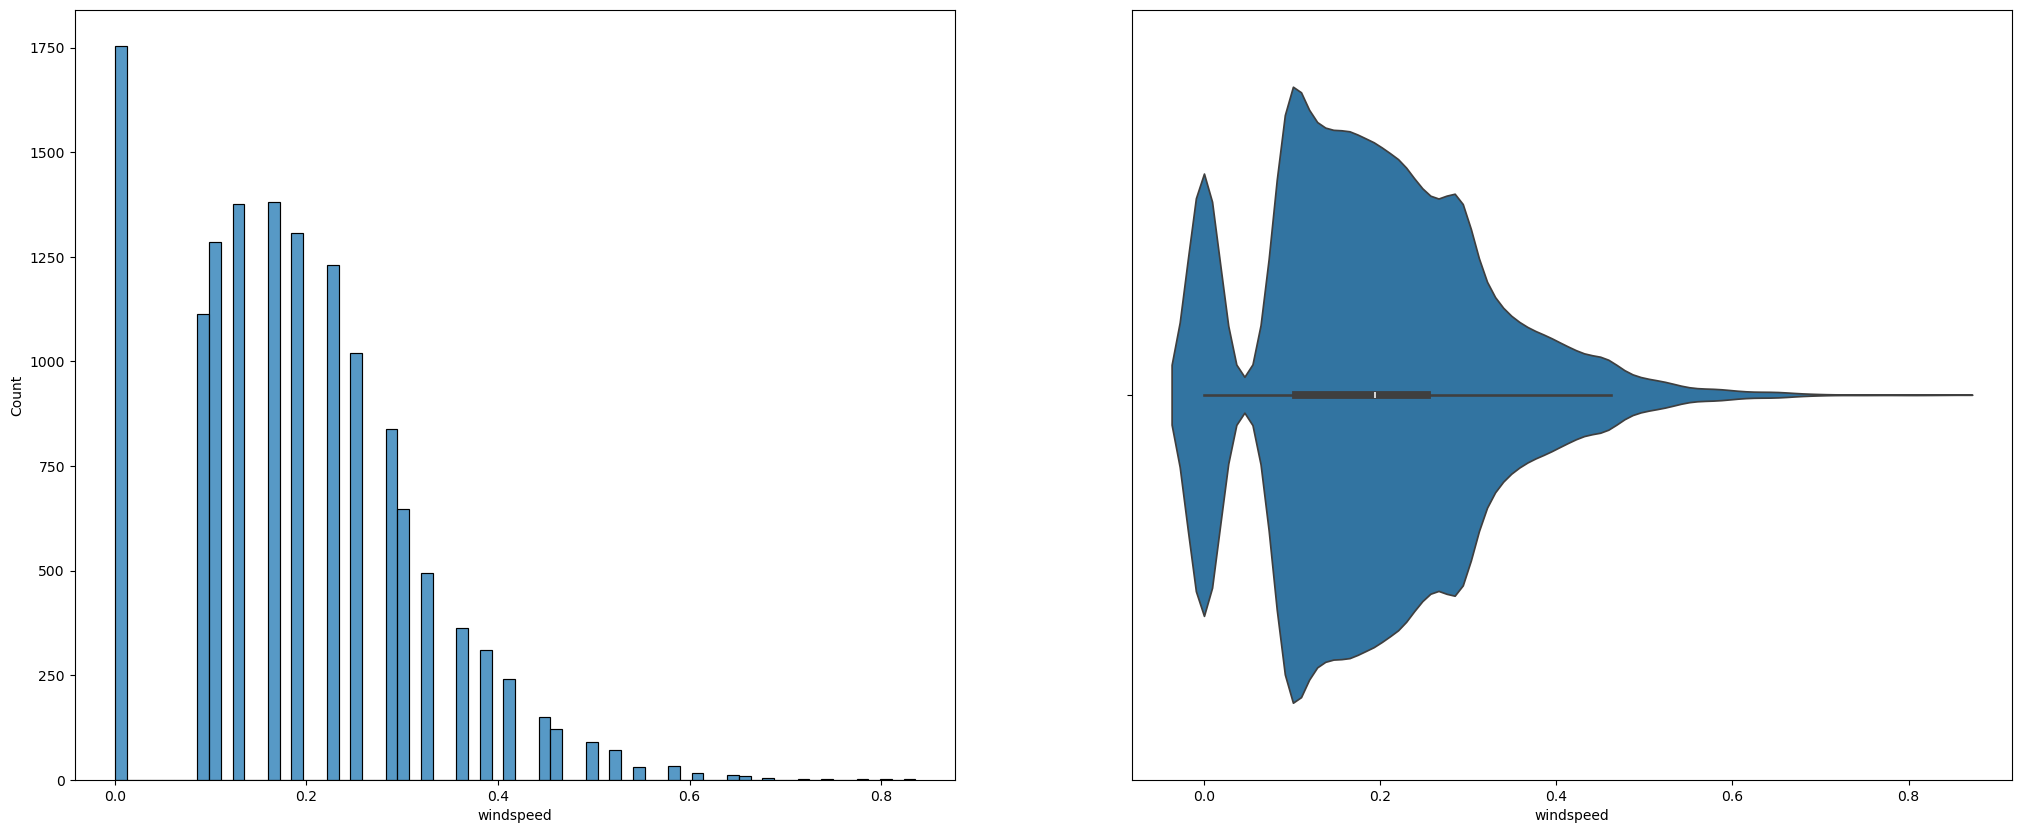

In [40]:
numVisualisation('windspeed')

There seems to be an overall exponential distribution, there aren't any outliers, so we can just proceed to visualising the relationship between the feature and the targets.

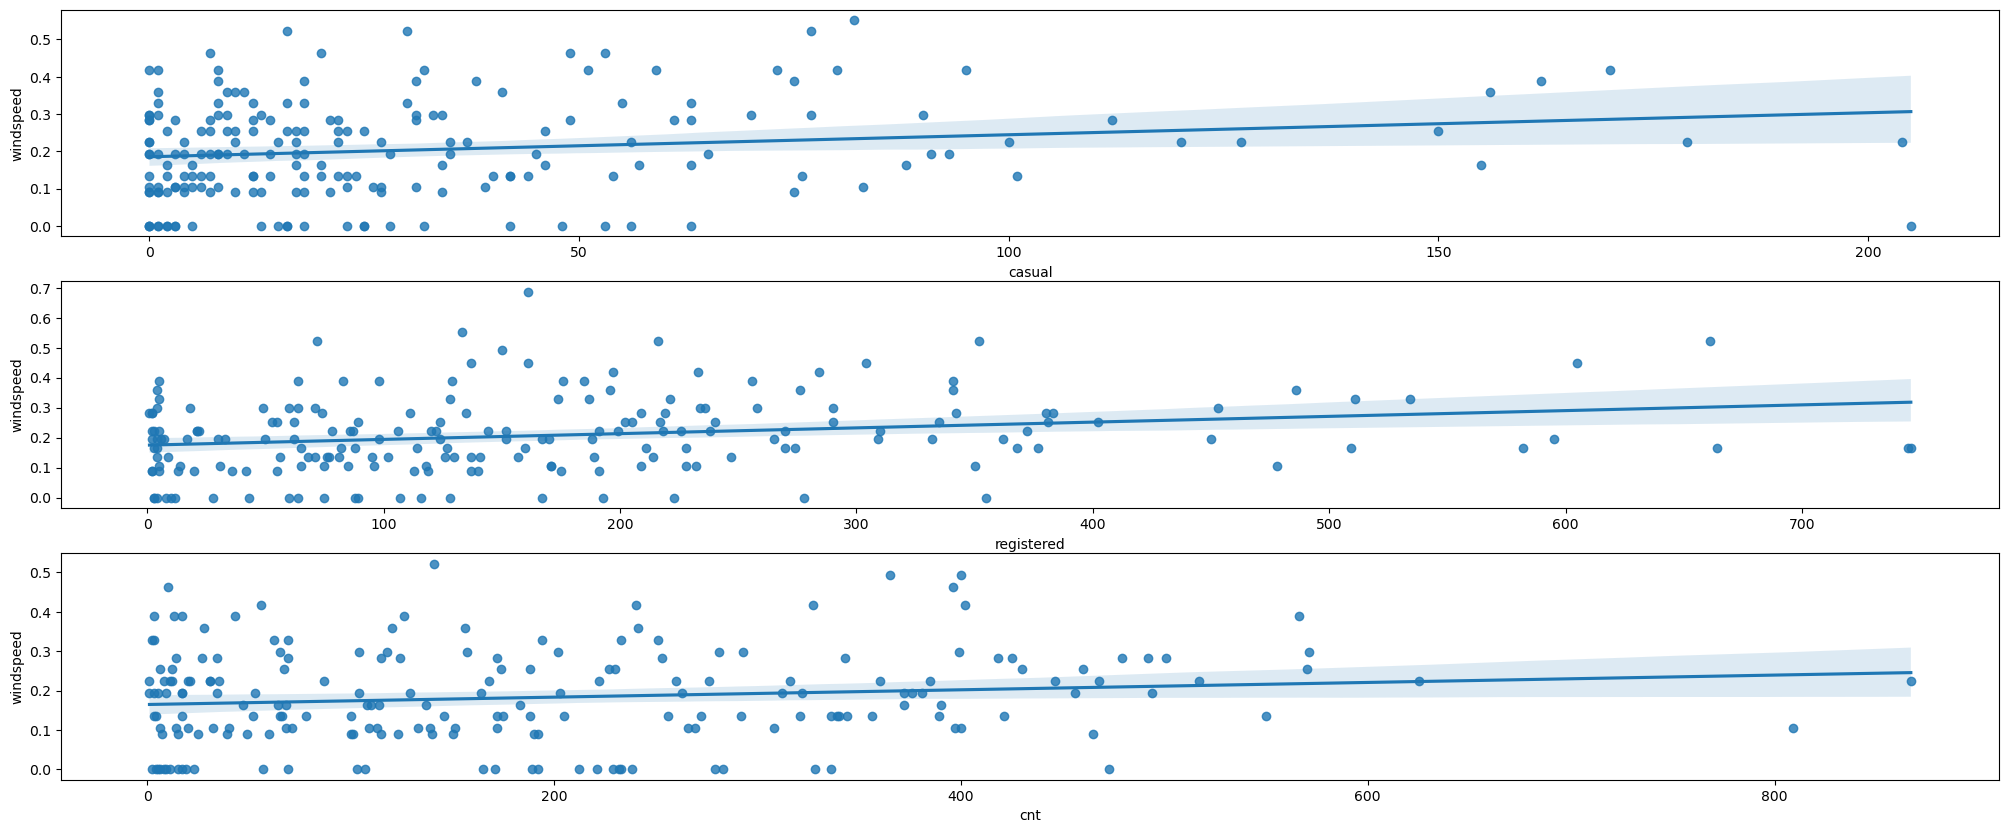

In [41]:
numVisualisationTgt('windspeed')

There does not seem to be any relationship between windspeed and the targets, we will further verify that later with the correlation matrices.

# Correlation matricies

# Pearson correlation

We will now generate the correlation matrices for our dataset, they can reveal some insights that we did not notice while visualising the data.

In [42]:
columns = train_data.columns
corr = train_data[columns].corr(numeric_only=True,method ="pearson")

casPearson = corr[['casual']] #saving the correlation indexes for our targets
regPearson = corr[['registered']]
cntPearson = corr[['cnt']]

corr

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.403407,0.865878,0.491729,-0.004238,0.018373,0.001088,-0.001422,-0.012172,0.140481,0.009095,-0.071816,0.158534,0.285151,0.281051
season,0.403407,1.000000,-0.011032,0.829401,-0.011288,-0.010150,0.002367,0.016519,-0.013633,0.313642,0.154157,-0.151866,0.119264,0.175674,0.179004
is_yr_one,0.865878,-0.011032,1.000000,-0.007799,-0.000925,0.010970,-0.007179,-0.000211,-0.018090,0.045096,-0.085902,-0.005338,0.143817,0.257086,0.253630
mnth,0.491729,0.829401,-0.007799,1.000000,-0.009529,0.017663,0.014697,-0.002336,0.007388,0.203277,0.166632,-0.135866,0.067515,0.123814,0.121675
hr,-0.004238,-0.011288,-0.000925,-0.009529,1.000000,-0.001484,-0.006374,0.003702,-0.014241,0.137964,-0.271381,0.131576,0.301066,0.375911,0.395473
holiday,0.018373,-0.010150,0.010970,0.017663,-0.001484,1.000000,-0.103295,-0.253508,-0.011243,-0.029913,-0.006205,0.004812,0.026087,-0.047689,-0.032740
weekday,0.001088,0.002367,-0.007179,0.014697,-0.006374,-0.103295,1.000000,0.029150,-0.000219,0.001542,-0.039577,0.012055,0.035603,0.021224,0.027373
workingday,-0.001422,0.016519,-0.000211,-0.002336,0.003702,-0.253508,0.029150,1.000000,0.040658,0.056755,0.011443,-0.021446,-0.297480,0.137986,0.034534
weathersit,-0.012172,-0.013633,-0.018090,0.007388,-0.014241,-0.011243,-0.000219,0.040658,1.000000,-0.103612,0.419602,0.023193,-0.154699,-0.122517,-0.144234
temp,0.140481,0.313642,0.045096,0.203277,0.137964,-0.029913,0.001542,0.056755,-0.103612,1.000000,-0.069364,-0.030811,0.458044,0.335116,0.403982


<Axes: >

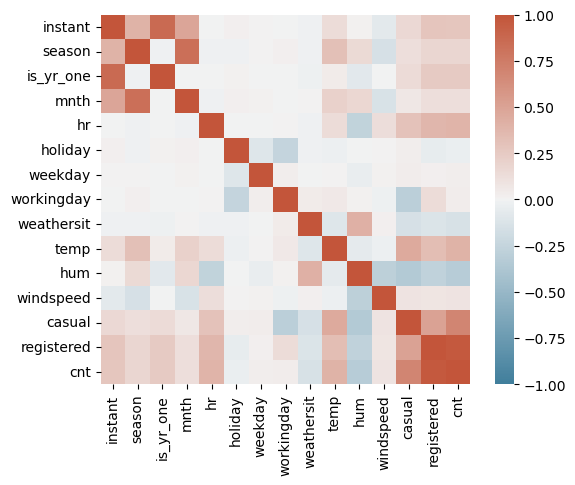

In [43]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

As can be seen, temp and atemp, as expected are extremely correlated, month and season are also related, but to a not as high degree as temp and atemp, we wil discuss how we will deal with that later.

We will do another visualisation for the relationship for the targets, but first we need to get the absolute values for the correlation indexes, since that is what matters to us.

In [44]:
casPearson = casPearson.abs()
regPearson = regPearson.abs()
cntPearson = cntPearson.abs()

Next, we have to drop the Target values from the correlation indexes, since they are what we want to predict, so ideally they should not be included in our models

In [45]:
casPearson.drop(['casual','registered','cnt'],inplace=True)
regPearson.drop(['casual','registered','cnt'],inplace=True)
cntPearson.drop(['casual','registered','cnt'],inplace=True)

Finally, we need to sort our correlation indexes in descending order

In [46]:
casPearson.sort_values(ascending=False,inplace=True,by= 'casual')
regPearson.sort_values(ascending=False,inplace=True,by= 'registered')
cntPearson.sort_values(ascending=False,inplace=True,by= 'cnt')

We now have 3 small dataframes with our correlation indexes, we can now plot them to ease our visualisation of it.

<Axes: ylabel='cnt'>

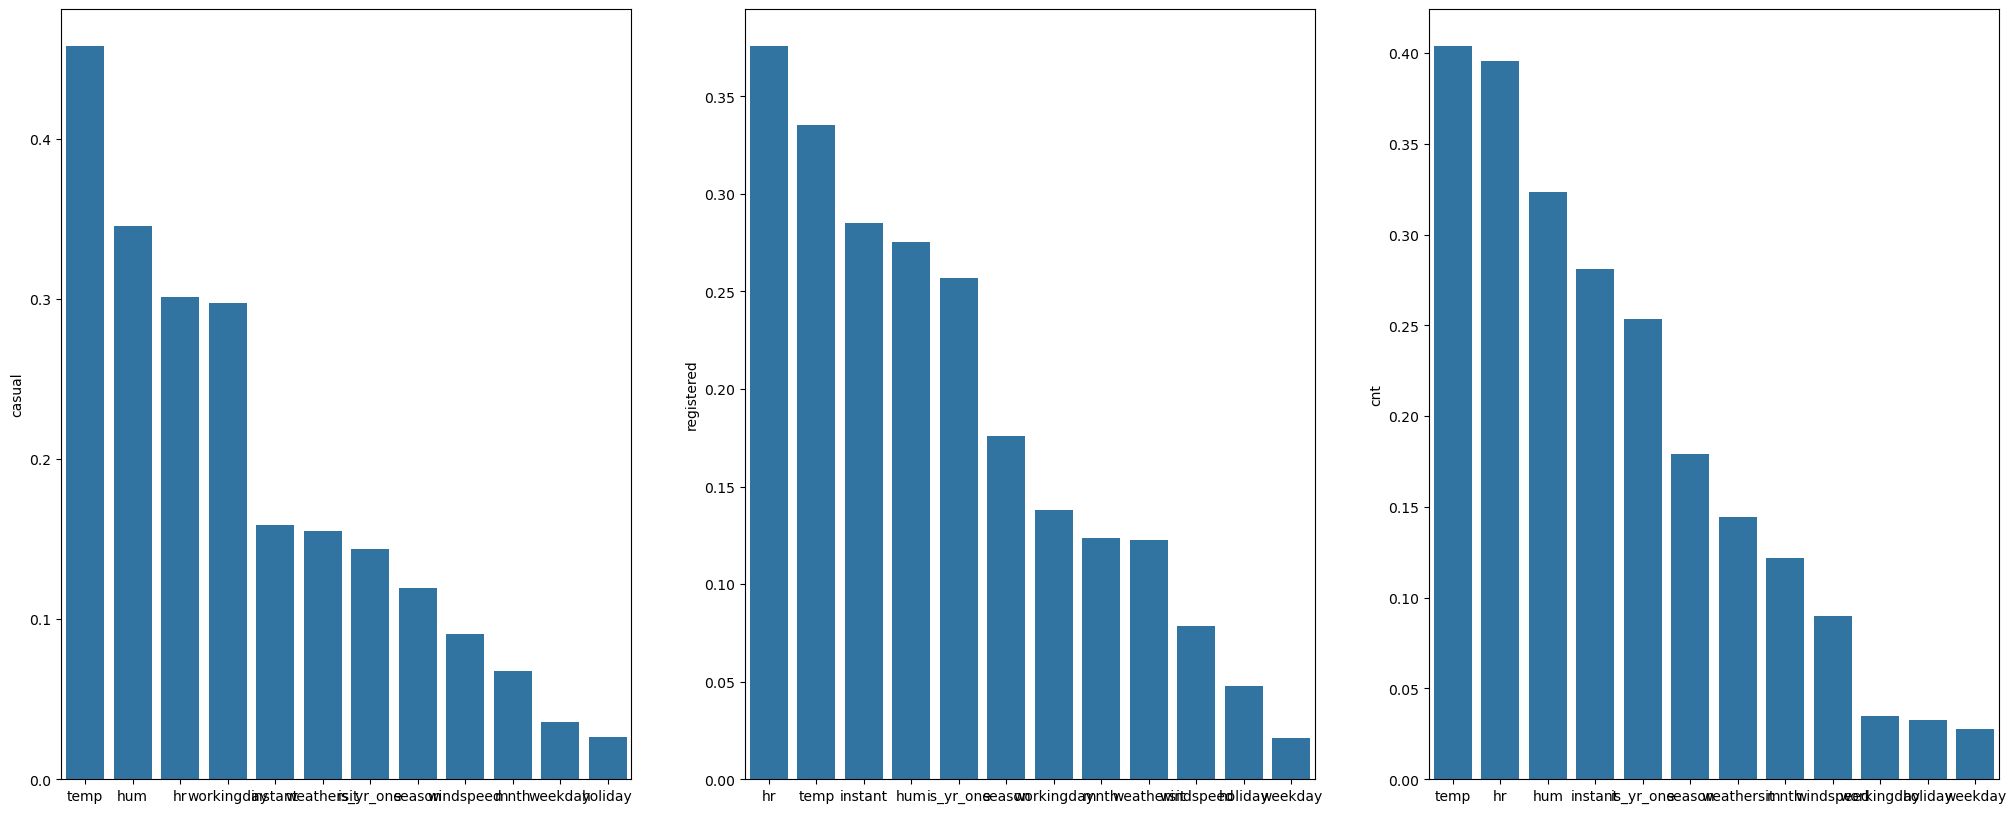

In [47]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
sns.barplot(casPearson.casual,ax=axes[0])
sns.barplot(regPearson.registered,ax=axes[1])
sns.barplot(cntPearson.cnt,ax=axes[2])

In [48]:
top10casP = casPearson.iloc[0:10].index
top10regP = regPearson.iloc[0:10].index
top10cntP = cntPearson.iloc[0:10].index

print(str(top10casP)+'\r'+str(top10regP)+'\r'+str(top10cntP)+'\r')

Index(['temp', 'hum', 'hr', 'workingday', 'instant', 'weathersit', 'is_yr_one',
       'season', 'windspeed', 'mnth'],
Index(['hr', 'temp', 'instant', 'hum', 'is_yr_one', 'season', 'workingday',
       'mnth', 'weathersit', 'windspeed'],
Index(['temp', 'hr', 'hum', 'instant', 'is_yr_one', 'season', 'weathersit',
       'mnth', 'windspeed', 'workingday'],
      dtype='object')


We now have the best predictors for each of our targets, we can use other correlation algorithms to see if they reveal something new.

# Spearman's rank coefficient

We will now use antoher coefficient algorithm to try and get new insights.

In [49]:
columns = train_data.columns
corr = train_data[columns].corr(numeric_only=True,method ="spearman")

casSpearman = corr[['casual']] #saving the correlation indexes for our targets
regSpearman = corr[['registered']]
cntSpearman = corr[['cnt']]

corr

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.403432,0.866012,0.491535,-0.004261,0.018341,0.001060,-0.001392,-0.004431,0.133254,0.006771,-0.070370,0.161877,0.259097,0.246994
season,0.403432,1.000000,-0.011002,0.829541,-0.011315,-0.010168,0.002392,0.016497,-0.011638,0.309178,0.151628,-0.138784,0.183865,0.184200,0.187187
is_yr_one,0.866012,-0.011002,1.000000,-0.007765,-0.000930,0.010970,-0.007192,-0.000211,-0.011664,0.040650,-0.085908,-0.006987,0.115698,0.223769,0.210100
mnth,0.491535,0.829541,-0.007765,1.000000,-0.009540,0.017741,0.014599,-0.002431,0.011918,0.194851,0.162318,-0.130407,0.121809,0.129369,0.128837
hr,-0.004261,-0.011315,-0.000930,-0.009540,1.000000,-0.001468,-0.006426,0.003705,-0.024160,0.134073,-0.273416,0.134588,0.475422,0.511995,0.512008
holiday,0.018341,-0.010168,0.010970,0.017741,-0.001468,1.000000,-0.103088,-0.253508,-0.007379,-0.030657,-0.007844,0.004705,0.014324,-0.044474,-0.031087
weekday,0.001060,0.002392,-0.007192,0.014599,-0.006426,-0.103088,1.000000,0.028494,-0.001135,-0.002776,-0.038676,0.009606,0.018508,0.036370,0.032673
workingday,-0.001392,0.016497,-0.000211,-0.002431,0.003705,-0.253508,0.028494,1.000000,0.040677,0.057102,0.013525,-0.020194,-0.175890,0.086530,0.024645
weathersit,-0.004431,-0.011638,-0.011664,0.011918,-0.024160,-0.007379,-0.001135,0.040677,1.000000,-0.105198,0.411597,0.008045,-0.163654,-0.113323,-0.127713
temp,0.133254,0.309178,0.040650,0.194851,0.134073,-0.030657,-0.002776,0.057102,-0.105198,1.000000,-0.053652,-0.016873,0.569377,0.374868,0.423919


<Axes: >

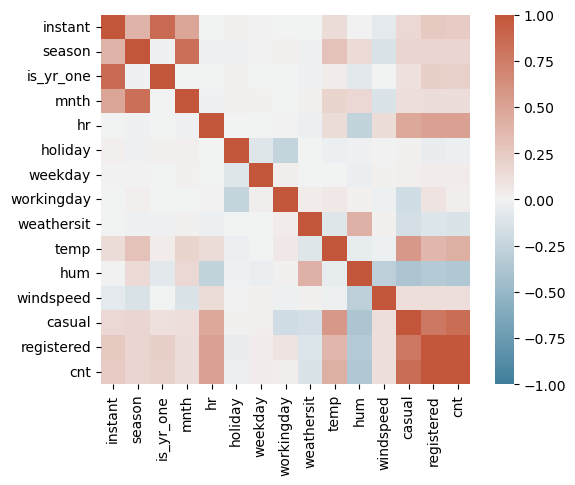

In [50]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

Apparently there are no new insights, we will do the same visualisations and modifications to our correlation indexes for our targets.

In [51]:
casSpearman = casSpearman.abs()
regSpearman = regSpearman.abs()
cntSpearman = cntSpearman.abs()

casSpearman.drop(['casual','registered','cnt'],inplace=True)
regSpearman.drop(['casual','registered','cnt'],inplace=True)
cntSpearman.drop(['casual','registered','cnt'],inplace=True)

casSpearman.sort_values(ascending=False,inplace=True,by= 'casual')
regSpearman.sort_values(ascending=False,inplace=True,by= 'registered')
cntSpearman.sort_values(ascending=False,inplace=True,by= 'cnt')

<Axes: ylabel='cnt'>

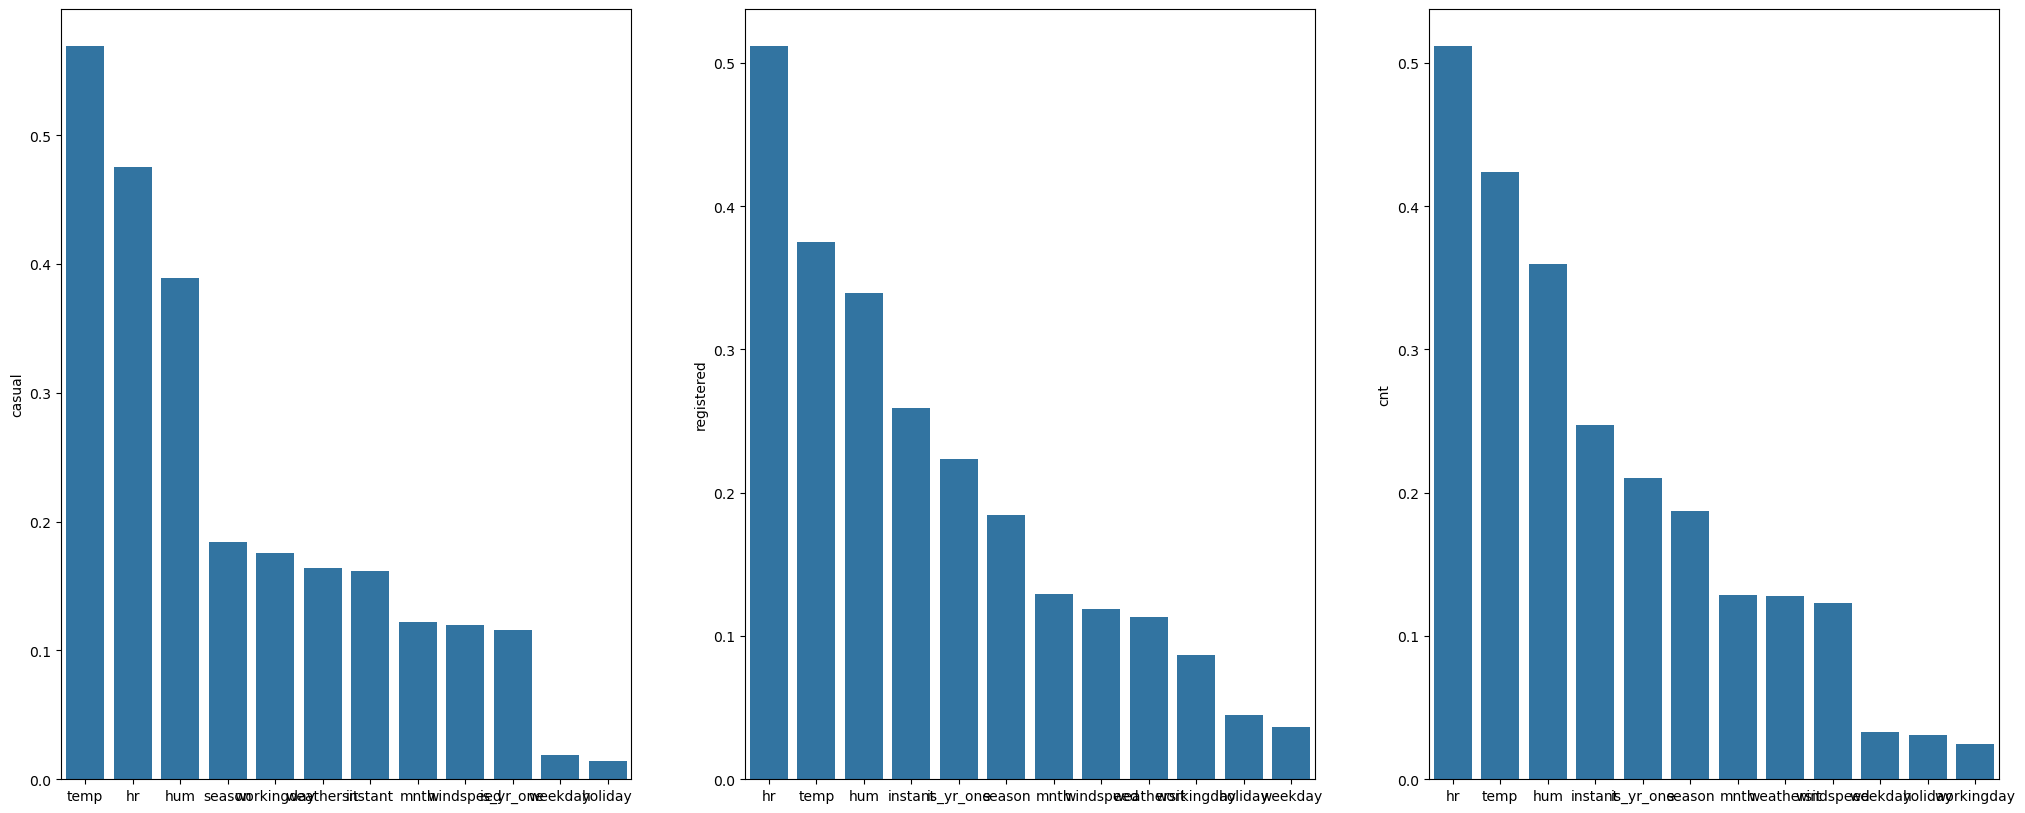

In [52]:
fig, axes = plt.subplots(1,3, figsize=(25, 10))
sns.barplot(casSpearman.casual,ax=axes[0])
sns.barplot(regSpearman.registered,ax=axes[1])
sns.barplot(cntSpearman.cnt,ax=axes[2])

In [53]:
top10casS = casSpearman.iloc[0:10].index
top10regS = regSpearman.iloc[0:10].index
top10cntS = cntSpearman.iloc[0:10].index

print(str(top10casS)+'\r'+str(top10regS)+'\r'+str(top10cntS)+'\r')

Index(['temp', 'hr', 'hum', 'season', 'workingday', 'weathersit', 'instant',
       'mnth', 'windspeed', 'is_yr_one'],
Index(['hr', 'temp', 'hum', 'instant', 'is_yr_one', 'season', 'mnth',
       'windspeed', 'weathersit', 'workingday'],
Index(['hr', 'temp', 'hum', 'instant', 'is_yr_one', 'season', 'mnth',
       'weathersit', 'windspeed', 'weekday'],
      dtype='object')


There doesn't seem to be any major changes, with most of the features appearing in both rankings, just in a slightly different order.

# Linear regression modeling 

Before we start our modeling, we need to drop the target variables from our dataset, and get an array of our features, this will be useful later.

In [54]:
features = train_data.columns.drop(['casual','registered','cnt'])
features

Index(['instant', 'season', 'is_yr_one', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

# K-fold cross-validation

Next we will define a function to do our K-fold cross-validation for us

In [55]:
from sklearn.model_selection import cross_val_score

def K_fold_validation_scoring(model,X,y,scoring:str):
    scores = cross_val_score(model, X, y, cv=10,scoring=scoring)#does 10-fold cross validation and returns the NRMSE scores
    return scores.mean()#returns the mean NRMSE value

Now we have a function that evaluates our models using K-fold cross-validation, with a K of 10, next we need to implement a forward selection algorithm to help us determine what features will be selected for our model.

# Forward selection with cross validation

We will now implement a forward selection algorithm using cross-validation.

In [56]:
def fwd_selection_cross_validation(X,y,features,minScoreVariation : float,detailedOutput : bool,scoring : str,model):
    used_features=[]#list to store the features should be used on our model according to forward selection 
    unused_features = list(features)#list of all the features available to our model, in the end will contain the unused features
    current_score = float('-inf')#variable to store the score of our curent model
    best_current_score = float('-inf')#variable to store the best score recorded

    while current_score == best_current_score:
        score_for_feature = []#list to store the score obtained with each feature
        for feature in unused_features:#iterates trough every unused feature and does 10-fold cross validation for each
            current_features = used_features + [feature]
            model.fit(X=X[current_features],y=y)
            score = K_fold_validation_scoring(model,X[current_features],y,scoring)
            score_for_feature.append((score,feature))
        
        score_for_feature.sort()#sorts the scores so the lowest value is on the beginning of the array
        best_current_score,best_feature = score_for_feature.pop(score_for_feature.__len__()-1)#gets the best feature along with its score

        if(detailedOutput):#if detailed output is set to True outputs more detailed information about the process
            print('Best current score: '+str(best_current_score)+'\nWith addition of feature: '+str(best_feature))

        if current_score < (best_current_score-minScoreVariation):#if the new score - the minimun varition set by the user
            unused_features.remove(best_feature)# is lower than the precious score, adds the feature to the selected features
            used_features.append(best_feature)# and replaces the current score with the new score
            current_score = best_current_score
        elif(detailedOutput):
                print('Rejected feature: '+best_feature+'\nReason : Low score decrease (<'+str(minScoreVariation)+')\nFinal model has '+str(used_features.__len__())+' features')

    return used_features,current_score

            

We now have a basic function that does forward selection with cross-validation, we can test it out by calculating the best features for target 'casual'

In [57]:
selected_features_casual,RMSE_casual = fwd_selection_cross_validation(X=train_data[features],y=train_data['casual'],features=features,minScoreVariation=0.02,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_casual = RMSE_casual * -1
print('Selected features: '+str(selected_features_casual)+'\nRMSE: '+str(RMSE_casual))

Best current score: -43.768791875816774
With addition of feature: temp
Best current score: -40.77539157811232
With addition of feature: workingday
Best current score: -37.810819020230646
With addition of feature: hum
Best current score: -36.94865429397326
With addition of feature: hr
Best current score: -36.610081786340324
With addition of feature: is_yr_one
Best current score: -36.55142857346564
With addition of feature: holiday
Best current score: -36.51376868577266
With addition of feature: season
Best current score: -36.488555905603775
With addition of feature: weekday
Best current score: -36.4807356296405
With addition of feature: weathersit
Rejected feature: weathersit
Reason : Low score decrease (<0.02)
Final model has 8 features
Selected features: ['temp', 'workingday', 'hum', 'hr', 'is_yr_one', 'holiday', 'season', 'weekday']
RMSE: 36.488555905603775


As can be seen we now have the best features for using in our linear regression model, selected with forward selection and cross-validation, as well as an expected RMSE of 36,16 obtained with 10-fold cross-validation. Due to the usage of robust techniques they should be close to the best ones possible according to the parameters we set.

Using our forward selection algorithm, we can get the best features for our other targets as well.

In [58]:
selected_features_registered,RMSE_registered = fwd_selection_cross_validation(X=train_data[features],y=train_data['registered'],features=features,minScoreVariation=0.03,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_registered = RMSE_registered * -1
print('Selected features: '+str(selected_features_registered)+'\nRMSE: '+str(RMSE_registered))

Best current score: -140.57850578112553
With addition of feature: hr
Best current score: -133.68395201319402
With addition of feature: instant
Best current score: -128.29514455316547
With addition of feature: temp
Best current score: -125.56342349122333
With addition of feature: hum
Best current score: -124.11563981972941
With addition of feature: workingday
Best current score: -124.02780974867468
With addition of feature: season
Best current score: -123.53260642603854
With addition of feature: is_yr_one
Best current score: -123.498254136933
With addition of feature: weathersit
Best current score: -123.45826793532198
With addition of feature: windspeed
Best current score: -123.44886113701277
With addition of feature: weekday
Rejected feature: weekday
Reason : Low score decrease (<0.03)
Final model has 9 features
Selected features: ['hr', 'instant', 'temp', 'hum', 'workingday', 'season', 'is_yr_one', 'weathersit', 'windspeed']
RMSE: 123.45826793532198


Now we have the best predictors for the registered target, with an RMSE of 123,06, the RMSE of this feature is higher due to the larger values it has on average, so the errors 'pile-up' more, so its not the best idea to compare the RMSE of different targets, we will discuss what we can use to compare them later.

In [59]:
selected_features_total,RMSE_total = fwd_selection_cross_validation(X=train_data[features],y=train_data['cnt'],features=features,minScoreVariation=0.03,detailedOutput=True,scoring = 'neg_root_mean_squared_error',model= LinearRegression())
RMSE_total = RMSE_total * -1
print('Selected features: '+str(selected_features_total)+'\nRMSE: '+str(RMSE_total))

Best current score: -166.23288065752268
With addition of feature: temp
Best current score: -154.10812096518515
With addition of feature: hr
Best current score: -147.92110650124474
With addition of feature: is_yr_one
Best current score: -143.72077157054497
With addition of feature: hum
Best current score: -142.13733886719874
With addition of feature: season
Best current score: -142.06394157280198
With addition of feature: holiday
Best current score: -142.0378551813879
With addition of feature: weekday
Rejected feature: weekday
Reason : Low score decrease (<0.03)
Final model has 6 features
Selected features: ['temp', 'hr', 'is_yr_one', 'hum', 'season', 'holiday']
RMSE: 142.06394157280198


And finally we have the selected features along with an expected RMSE of 141,41 for our final target of total count.

# Fitting the model and generating final evaluation metrics

Using the features we got we can now create our model, fit it with the data and get the final metrics for it.

# Casual

We will start by fitting the model and getting the predicted values for our Casual target. 

In [60]:
modelCasual = LinearRegression()
modelCasual.fit(X=train_data[selected_features_casual],y=train_data['casual'])

casual_y_pred = modelCasual.predict(test_data[selected_features_casual])

print("Coefficients: \n", modelCasual.coef_)

Coefficients: 
 [106.6461959  -35.03022209 -66.6076114    1.24580713  10.2282977
 -12.9549306    1.63453997   0.77170197]


From the predicted values from our model we can get the residuals, which will allow us to get many important metrics.

In [61]:
predictionsCasual = pd.DataFrame()
predictionsCasual['testing_values'] = test_data['casual']
predictionsCasual['predicted_values'] = casual_y_pred
predictionsCasual['residuals'] = predictionsCasual.testing_values - predictionsCasual.predicted_values.abs()
predictionsCasual

,testing_values,predicted_values,residuals
4532,39,76.916896,-37.916896
6157,1,-0.916827,0.083173
11752,4,28.314482,-24.314482
15649,5,10.712794,-5.712794
13547,111,76.285649,34.714351
...,...,...,...
12530,25,26.924551,-1.924551
12559,19,32.727831,-13.727831
14489,65,76.452071,-11.452071
9794,7,41.893324,-34.893324


First, we can take a look at the mean for the residuals, it should ideally be close to 0.

In [62]:
predictionsCasual.residuals.mean()

-3.569700510317349

The mean of our residuals is fairly close to 0, which is a good sign.

Next we have to check the distribution of our residuals, it should ideally be a normal distribution.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


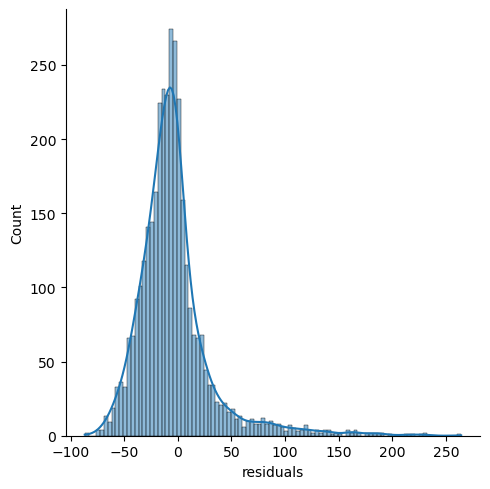

In [63]:
sns.displot(x = predictionsCasual.residuals, kde=True)

As can be seen, our residuals fall fairly close to a normal distribution, despite being slightly right skewed, we can check how close it is to a normal distribution with a qqplot.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

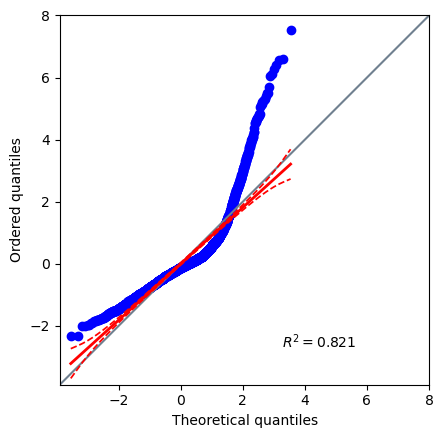

In [64]:
pg.qqplot(x=predictionsCasual.residuals)

As can be seen our residuals fall fairly close to a normal distribution, this is good, since it indicates to us that most of the residuals fall fairly close to 0 (which is close to our mean) and the number of observations gets lower the further away we get from 0.

Next we need to calculate some metrics for our model, namely $R^2$ adjusted $R^2$ and RMSE, first we will define a function that calculates the RMSE for our model.

In [65]:
def RMSE_calc(testing_values,residuals):
    y = testing_values
    n = len(y)
    p = 2
    df = n-p
    MSE = sum(residuals**2) / df
    RMSE = np.sqrt(MSE)
    return RMSE

We can now calculate the RMSE for our model using our function.

In [66]:
RMSEC = RMSE_calc(predictionsCasual.testing_values,predictionsCasual.residuals)
print('RMSE = '+str(RMSEC))

RMSE = 35.81574978750279


The RMSE stands for root mean squared error; since it is a metric of error, we ideally want it to be as low as possible, the value we got is satisfactory given our dataset.

Next we need to define a function to calculate $R^2$ and adjusted $R^2$.

In [67]:
def r2_calc(testing_values,residuals,training_data):
    SS_Residual = sum((residuals)**2)       
    SS_Total = sum((testing_values-np.mean(testing_values))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(testing_values)-1)/(len(testing_values)-training_data.shape[1]-1)
    return r_squared, adjusted_r_squared

With that we can now calculate the $R^2$ and adjusted $R^2$ vallues for our model.

In [68]:
R2C,adjustedR2C = r2_calc(predictionsCasual.testing_values,predictionsCasual.residuals,train_data[selected_features_casual])
print('R2 = '+str(R2C))
print('Adjusted R2 = '+str(adjustedR2C))

R2 = 0.47441356232285437
Adjusted R2 = 0.4732007871565962


In [69]:
from sklearn.metrics import  r2_score

r_squaredC = r2_score(predictionsCasual.testing_values,predictionsCasual.predicted_values)

print('R2 = '+str(r_squaredC))

R2 = 0.4640666179054619


$R^2$ and adjusted $R^2$ vary from 0 to 1, with 1 indicating that our model explains all the variance in our dataset and 0 indicating it explains none of the variance, ideally we want it be as close to 1 as possible.

# Registered

Now we will fit the model and get the predicted values from the model for the registered users. 

In [70]:
modelRegistered = LinearRegression()
modelRegistered.fit(X=train_data[selected_features_registered],y=train_data['registered'])

registered_y_pred = modelRegistered.predict(test_data[selected_features_registered])

print("Coefficients: \n", modelRegistered.coef_)

Coefficients: 
 [ 6.57840720e+00 -2.62839677e-04  1.72280261e+02 -1.28106928e+02
  4.08539581e+01  1.95443505e+01  7.35183827e+01 -6.29970720e+00
  2.94241014e+01]


In [71]:
predictionsRegistered = pd.DataFrame()
predictionsRegistered['testing_values'] = test_data['registered']
predictionsRegistered['predicted_values'] = registered_y_pred
predictionsRegistered['residuals'] = predictionsRegistered.testing_values - predictionsRegistered.predicted_values.abs()
predictionsRegistered

,testing_values,predicted_values,residuals
4532,472,271.839291,200.160709
6157,4,61.151951,-57.151951
11752,30,220.241452,-190.241452
15649,126,151.148138,-25.148138
13547,346,311.703365,34.296635
...,...,...,...
12530,478,168.025571,309.974429
12559,76,189.740905,-113.740905
14489,212,334.659601,-122.659601
9794,38,52.653893,-14.653893


Next we have to calculate the mean of our residuals, which should be close to 0.

In [72]:
predictionsRegistered.residuals.mean()

-3.1152036316471357

Great, the value is very close to 0, next we need to check the distribution of our residuals.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


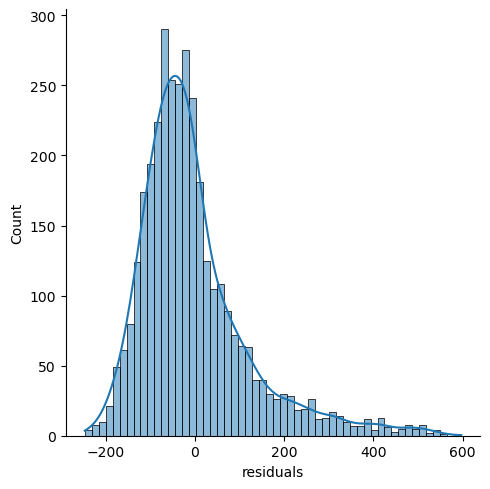

In [73]:
sns.displot(x = predictionsRegistered.residuals, kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

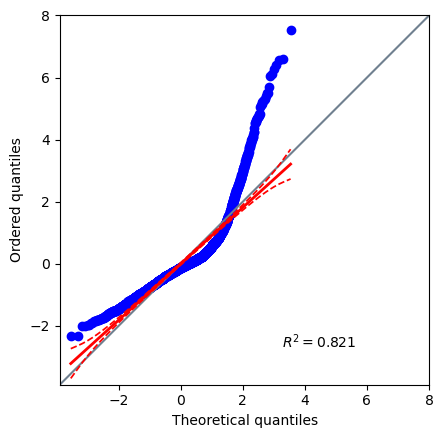

In [74]:
pg.qqplot(x=predictionsCasual.residuals)

Again good results, our distribution is close to an ideal normal distribution.

Next we will calculate the important metrics.

In [75]:
RMSER = RMSE_calc(predictionsRegistered.testing_values,predictionsRegistered.residuals)
print('RMSE = '+str(RMSER))

RMSE = 123.42722422563449


Again, we got a good RMSE value.

Now to calculating the value of $R^2$

In [76]:
R2R,adjustedR2R = r2_calc(predictionsRegistered.testing_values,predictionsRegistered.residuals,train_data[selected_features_registered])
print('R2 = '+str(R2R))
print('Adjusted R2 = '+str(adjustedR2R))

R2 = 0.3217377773003782
Adjusted R2 = 0.3199765655276441


In [77]:
r_squaredR = r2_score(predictionsRegistered.testing_values,predictionsRegistered.predicted_values)

print('R2 = '+str(r_squaredR))

R2 = 0.31860268859659613


We got decent values for $R^2$ and adjusted $R^2$ so we can now examine our model for the last feature.

# Total

First, again to fit the model and get the predicted values.

In [78]:
modelTotal = LinearRegression()
modelTotal.fit(X=train_data[selected_features_total],y=train_data['cnt'])

total_y_pred = modelTotal.predict(test_data[selected_features_total])

print("Coefficients: \n", modelTotal.coef_)

Coefficients: 
 [ 280.56856668    7.78127669   81.06175566 -209.53736034   20.56734248
  -27.95059975]


In [79]:
predictionsTotal = pd.DataFrame()
predictionsTotal['testing_values'] = test_data['cnt']
predictionsTotal['predicted_values'] = total_y_pred
predictionsTotal['residuals'] = predictionsTotal.testing_values - predictionsTotal.predicted_values.abs()
predictionsTotal

,testing_values,predicted_values,residuals
4532,511,344.854256,166.145744
6157,5,64.269213,-59.269213
11752,34,254.349739,-220.349739
15649,131,164.843533,-33.843533
13547,457,388.653847,68.346153
...,...,...,...
12530,503,193.072959,309.927041
12559,95,227.113846,-132.113846
14489,277,405.935152,-128.935152
9794,45,96.801850,-51.801850


Next we have to calculate the mean of the residuals, remembering that it should be ideally close to 0.

In [80]:
predictionsTotal.residuals.mean()

-3.5029311180820875

Again we got a good value for it, next we need to check the distribution of our residuals.

C:\Users\lucas\anaconda3\envs\data_mining\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


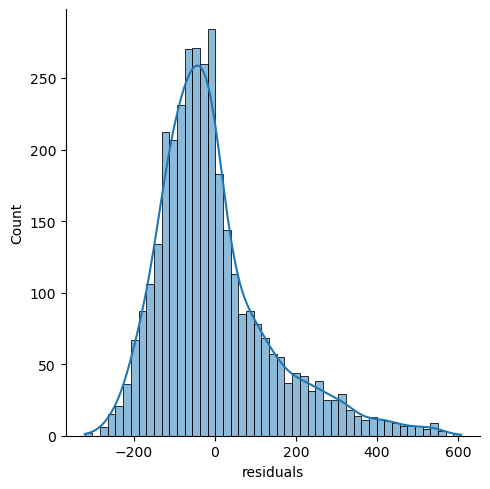

In [81]:
sns.displot(x = predictionsTotal.residuals, kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

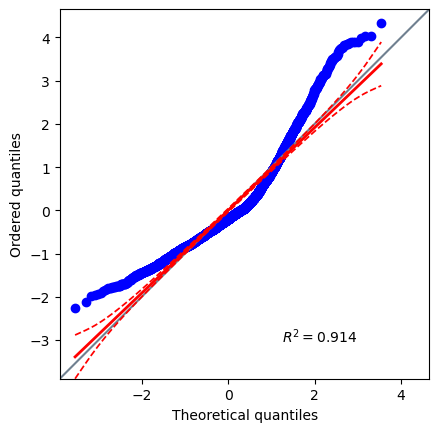

In [82]:
pg.qqplot(x=predictionsTotal.residuals)

The residuals for Total were the closest to a normal distribution, that is a sign that we got a good model.

Next we need to look at the metrics for this model, starting with RMSE, which is expected to be higher for this target, since it has the highest values on average.

In [83]:
RMSET = RMSE_calc(predictionsTotal.testing_values,predictionsTotal.residuals)
print('RMSE = '+str(RMSET))

RMSE = 141.4083444146447


Again, we got a good value for our RMSE considering this is the feature with the highest mean values.

Next we have to calculate the $R^2$ and the adjusted $R^2$.

In [84]:
R2T,adjustedR2T = r2_calc(predictionsTotal.testing_values,predictionsTotal.residuals,train_data[selected_features_total])
print('R2 = '+str(R2T))
print('Adjusted R2 = '+str(adjustedR2T))

R2 = 0.38268894644247164
Adjusted R2 = 0.38162124211230586


Again we got good values for $R^2$ and adjusted $R^2$

# Which target was the easiest to predict?

In [85]:
best_target = 'casual'

# Classification

Before we start modeling and measuring our classification models, we first need to turn one of our numerical targets into a categorical target, we will be using the target we decided earlier was the one that got the best result with regression. 

To turn it into a categorical target we will be dividing it into four different categories divided by each 25th percentile, so the first category will be x>0 to x <= 25th percentile and so on.

First, we need to calculate our percentiles.

In [86]:
percentiles = []
percentiles.append(bike_hourly[best_target].quantile(q=0.25))
percentiles.append(bike_hourly[best_target].quantile(q=0.50))
percentiles.append(bike_hourly[best_target].quantile(q=0.75))
percentiles

[4.0, 17.0, 48.0]

Now that we have the values for our percentiles we can creeate a new categorical target based on those percentiles.

In [87]:
cat_target = []
for value in train_data[best_target]:
    if value <= percentiles[0]:
        cat_target.append("Low demand")
    elif value <= percentiles[1]:
        cat_target.append('Medium-Low demand')
    elif value <= percentiles[2]:
        cat_target.append('Medium-High demand')
    else:
        cat_target.append('High demand')

train_data['Categorical_target'] = cat_target

train_data['Categorical_target'] = train_data['Categorical_target'].astype('category')
train_data

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Categorical_target
10193,10194,1,True,3,19,False,1,True,1,0.26,0.53,0.2239,6,220,226,Medium-Low demand
17256,17257,1,True,12,21,False,3,True,2,0.30,0.87,0.2985,0,20,20,Low demand
8363,8364,4,False,12,3,False,2,True,2,0.34,0.61,0.0000,1,1,2,Low demand
3298,3299,2,False,5,8,False,0,False,1,0.60,0.73,0.0896,29,65,94,Medium-High demand
11912,11913,2,True,5,13,False,3,True,1,0.72,0.42,0.0000,77,273,350,High demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,4260,3,False,7,9,False,5,True,1,0.74,0.35,0.1642,58,202,260,High demand
11328,11329,2,True,4,5,False,0,False,2,0.44,0.77,0.2239,0,6,6,Low demand
11414,11415,2,True,4,19,False,3,True,1,0.60,0.20,0.1940,42,501,543,Medium-High demand
8267,8268,4,False,12,3,False,5,True,1,0.46,0.82,0.1343,2,3,5,Low demand


In [88]:
cat_target = []
for value in test_data[best_target]:
    if value <= percentiles[0]:
        cat_target.append("Low demand")
    elif value <= percentiles[1]:
        cat_target.append('Medium-Low demand')
    elif value <= percentiles[2]:
        cat_target.append('Medium-High demand')
    else:
        cat_target.append('High demand')

test_data['Categorical_target'] = cat_target

test_data['Categorical_target'] = test_data['Categorical_target'].astype('category')
test_data

,instant,season,is_yr_one,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Categorical_target
4532,4533,3,False,7,18,False,2,True,1,0.86,0.47,0.2985,39,472,511,Medium-High demand
6157,6158,3,False,9,3,False,1,True,2,0.50,0.77,0.1343,1,4,5,Low demand
11752,11753,2,True,5,21,False,3,True,3,0.50,0.82,0.1642,4,30,34,Low demand
15649,15650,4,True,10,6,False,5,True,3,0.54,0.94,0.1642,5,126,131,Medium-Low demand
13547,13548,3,True,7,16,False,1,True,1,0.82,0.52,0.1343,111,346,457,High demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12530,12531,2,True,6,7,False,1,True,1,0.64,0.78,0.1045,25,478,503,Medium-High demand
12559,12560,2,True,6,12,False,2,True,3,0.66,0.83,0.2537,19,76,95,Medium-High demand
14489,14490,3,True,8,22,False,5,True,1,0.76,0.58,0.1940,65,212,277,High demand
9794,9795,1,True,2,1,False,6,False,1,0.32,0.49,0.1642,7,38,45,Medium-Low demand


We now have our categorical target, we can quickly do a visualisation just to see how its distributed, since it was derived from the percentiles we should see a roughly equal number of observations for every category.

<Axes: xlabel='Categorical_target', ylabel='count'>

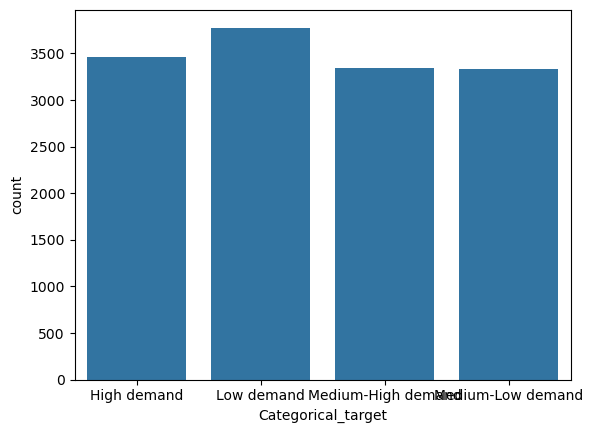

In [89]:
sns.countplot(train_data,x='Categorical_target')

As can be seen, we have a roughly equal representation of every category, there are a few more observations on Low demand, but not enough that it would be a problem.

# Forward selection with K-fold cross-validation

We already have our K-fold cross-validation function set up, we just need to give it our model along with the new train test split data and it should be able to work out the best targets for us 

In [90]:
features = train_data.columns.drop(['casual','registered','cnt','Categorical_target'])
features

Index(['instant', 'season', 'is_yr_one', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

We will start with a Logistic Regression model as our first categorical model, we will be testing $l1$ (Lasso regression) and $l2$ (Ridge regression)(testing was done, $l1$ took over 20 minutes to complete forward selection, thus its not included in the notebook as to not impact total runtime), and picking the one that gives us the best results with forward selection.

In [91]:
from sklearn.linear_model import LogisticRegression

catModel1 = LogisticRegression(penalty='l2', max_iter=7600,solver='lbfgs')

In [92]:
selected_features_log_reg,acc_log_reg = fwd_selection_cross_validation(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.001,detailedOutput=True,scoring = 'accuracy',model= catModel1)
print('Selected features: '+str(selected_features_log_reg)+'\nAccuracy: '+str(acc_log_reg))

Best current score: 0.4193330712856027
With addition of feature: temp
Best current score: 0.49701348339013907
With addition of feature: hr
Best current score: 0.5334801317824245
With addition of feature: hum
Best current score: 0.5505980377452171
With addition of feature: workingday
Best current score: 0.5580064546493647
With addition of feature: is_yr_one
Best current score: 0.5583663220394209
With addition of feature: holiday
Rejected feature: holiday
Reason : Low score decrease (<0.001)
Final model has 5 features
Selected features: ['temp', 'hr', 'hum', 'workingday', 'is_yr_one']
Accuracy: 0.5580064546493647


Now that we have the predicted accuracy and selected features for logistical regression we can do forward selection for another classification algorithm, we will be using random forest.

In [93]:
from sklearn.ensemble import RandomForestClassifier

catModel2 = RandomForestClassifier(n_estimators = 100)

In [94]:
selected_features_log_reg,acc_log_reg = fwd_selection_cross_validation(X=train_data[features],y=train_data['Categorical_target'],features=features,minScoreVariation=0.001,detailedOutput=True,scoring = 'accuracy',model= catModel2)
print('Selected features: '+str(selected_features_log_reg)+'\nAccuracy: '+str(acc_log_reg))

Best current score: 0.6864684585904246
With addition of feature: instant
Best current score: 0.6863245736983383
With addition of feature: season
Rejected feature: season
Reason : Low score decrease (<0.001)
Final model has 1 features
Selected features: ['instant']
Accuracy: 0.6864684585904246
